In [ ]:
from google.colab import drive
drive.mount("/gdrive")
%cd /gdrive

Mounted at /gdrive
/gdrive


# Work through the notebook

In [ ]:
# Python Imports
import math
import time
import scipy
import datetime
import psutil
import random

# Data Manipulation
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import euclidean_distances

from statistics import mean

In [ ]:
sns.set_style("whitegrid")

Loading the data

In [ ]:
#import df
df = pd.read_csv("/gdrive/My Drive/sensor_data/01-06/C2/c2_combine.csv")
df

,Time,52_temp,52_humidity,52_M2,52_M1,51_temp,51_humidity,51_M2,51_M1,50_temp,50_humidity,50_M2,50_M1,number of person,Type of crowd,weather,Schedule,Day_timea,Unnamed: 18
0,18:01:32,26.700001,62.200001,1,0.0,27.9,68.199997,1.0,0.0,24.9,68.500000,1,0,3,static,cloudy,holiday,evening,
1,18:01:33,26.700001,62.200001,1,0.0,27.9,68.199997,1.0,0.0,24.9,68.500000,1,0,3,static,cloudy,holiday,evening,
2,18:01:34,26.700001,62.200001,1,0.0,27.9,68.199997,1.0,0.0,24.9,68.500000,1,0,3,static,cloudy,holiday,evening,
3,18:01:35,26.700001,62.200001,1,0.0,27.9,67.900002,1.0,0.0,24.9,68.199997,1,0,3,static,cloudy,holiday,evening,
4,18:01:36,26.700001,62.200001,0,1.0,27.9,67.900002,1.0,0.0,24.9,68.199997,1,0,3,static,cloudy,holiday,evening,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4634,19:18:51,25.400000,50.200001,0,0.0,26.5,50.900002,1.0,0.0,24.4,54.900002,1,0,0,no crowd,cloudy,holiday,evening,
4635,19:18:52,25.400000,50.299999,1,1.0,26.5,50.900002,1.0,0.0,24.4,54.900002,1,0,0,no crowd,cloudy,holiday,evening,
4636,19:18:53,25.400000,50.299999,1,1.0,26.5,50.900002,1.0,0.0,24.4,54.900002,1,0,0,no crowd,cloudy,holiday,evening,
4637,19:18:54,25.400000,50.299999,1,1.0,26.6,50.900002,1.0,0.0,24.4,54.900002,1,0,0,no crowd,cloudy,holiday,evening,


In [ ]:
df["number of person"].unique()

array(['3', ' cloudy', '2', ' static', '4', ' random', '1', '6', '7', '0'],
      dtype=object)

In [ ]:
print(df[df["number of person"] == " cloudy"].count())
print(df[df["number of person"] == " static"].count())
print(df[df["number of person"] == " random"].count())

Time                6
52_temp             6
52_humidity         6
52_M2               6
52_M1               6
51_temp             6
51_humidity         6
51_M2               6
51_M1               6
50_temp             6
50_humidity         6
50_M2               6
50_M1               6
number of person    6
Type of crowd       6
weather             6
Schedule            6
Day_timea           0
Unnamed: 18         0
dtype: int64
Time                12
52_temp             12
52_humidity         12
52_M2               12
52_M1               12
51_temp             12
51_humidity         12
51_M2               12
51_M1               12
50_temp             12
50_humidity         12
50_M2               12
50_M1               12
number of person    12
Type of crowd       12
weather             12
Schedule            12
Day_timea           12
Unnamed: 18          0
dtype: int64
Time                3
52_temp             3
52_humidity         3
52_M2               3
52_M1               3
51_temp  

In [ ]:
21/df.shape[0]*100

0.4526837680534598

In [ ]:
#drop 
df.drop(df.loc[df["number of person"]==" cloudy"].index, inplace=True)
df.drop(df.loc[df["number of person"]==" static"].index, inplace=True)
df.drop(df.loc[df["number of person"]==" random"].index, inplace=True)

In [ ]:
#check
df["number of person"].unique()

array(['3', '2', '4', '1', '6', '7', '0'], dtype=object)

In [ ]:
print("Percentage of false values", len(df[df["number of person"] == "0"]))
print("Pecentage of true values", len(df[df["number of person"] != "0"]))

Percentage of false values 300
Pecentage of true values 4318


In [ ]:
np.random.seed(10)

remove_n = 3583
df_ = df.loc[df["number of person"] !="0"]
drop_indices = np.random.choice(df_.index, remove_n, replace=False)
df = df.drop(drop_indices)

In [ ]:
print("Percentage of false values", len(df[df["number of person"] == "0"])/df.shape[0])
print("Pecentage of true values", len(df[df["number of person"] != "0"])/df.shape[0])

Percentage of false values 0.2898550724637681
Pecentage of true values 0.7101449275362319


In [ ]:
df["number of person"].replace("0", 0, inplace=True)
df["number of person"].replace("1", 1, inplace=True)
df["number of person"].replace("2", 1, inplace=True)
df["number of person"].replace("3", 1, inplace=True)
df["number of person"].replace("4", 1, inplace=True)
df["number of person"].replace("6", 1, inplace=True)
df["number of person"].replace("7", 1, inplace=True)

In [ ]:
print("Percentage of false values", len(df[df["number of person"] == 0])/df.shape[0])
print("Pecentage of true values", len(df[df["number of person"] != 0])/df.shape[0])

Percentage of false values 0.2898550724637681
Pecentage of true values 0.7101449275362319


In [ ]:
df["number of person"].unique()

array([1, 0])

In [ ]:
#check for any discrepancies in the dataset
df.isna().sum()

Time                0
52_temp             0
52_humidity         0
52_M2               0
52_M1               0
51_temp             0
51_humidity         0
51_M2               0
51_M1               0
50_temp             0
50_humidity         0
50_M2               0
50_M1               0
number of person    0
Type of crowd       0
weather             0
Schedule            0
Day_timea           0
Unnamed: 18         0
dtype: int64

In [ ]:
#check for column names
print(df.columns)

Index(['Time', '52_temp', '52_humidity', '52_M2', '52_M1', '51_temp',
       '51_humidity', '51_M2', '51_M1', '50_temp', '50_humidity', '50_M2',
       '50_M1', 'number of person', 'Type of crowd', 'weather', 'Schedule',
       'Day_timea', 'Unnamed: 18'],
      dtype='object')


In [ ]:
df.drop(columns = ["Type of crowd", "weather", "Schedule", "Day_timea", "Unnamed: 18"], inplace = True)
print(df.columns)

Index(['Time', '52_temp', '52_humidity', '52_M2', '52_M1', '51_temp',
       '51_humidity', '51_M2', '51_M1', '50_temp', '50_humidity', '50_M2',
       '50_M1', 'number of person'],
      dtype='object')


In [ ]:
df["Time"] = pd.to_timedelta(df["Time"])

In [ ]:
df

,Time,52_temp,52_humidity,52_M2,52_M1,51_temp,51_humidity,51_M2,51_M1,50_temp,50_humidity,50_M2,50_M1,number of person
0,0 days 18:01:32,26.700001,62.200001,1,0.0,27.900000,68.199997,1.0,0.0,24.900000,68.500000,1,0,1
14,0 days 18:01:46,26.700001,62.400002,0,1.0,27.900000,67.900002,1.0,0.0,24.799999,67.800003,1,1,1
15,0 days 18:01:47,26.700001,62.400002,0,1.0,27.900000,67.900002,1.0,1.0,24.799999,67.800003,1,1,1
26,0 days 18:01:58,26.600000,62.500000,1,0.0,27.799999,66.800003,1.0,0.0,24.799999,67.900002,1,1,1
44,0 days 18:02:16,26.600000,62.799999,0,1.0,27.799999,65.500000,1.0,0.0,24.700001,67.599998,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4634,0 days 19:18:51,25.400000,50.200001,0,0.0,26.500000,50.900002,1.0,0.0,24.400000,54.900002,1,0,0
4635,0 days 19:18:52,25.400000,50.299999,1,1.0,26.500000,50.900002,1.0,0.0,24.400000,54.900002,1,0,0
4636,0 days 19:18:53,25.400000,50.299999,1,1.0,26.500000,50.900002,1.0,0.0,24.400000,54.900002,1,0,0
4637,0 days 19:18:54,25.400000,50.299999,1,1.0,26.600000,50.900002,1.0,0.0,24.400000,54.900002,1,0,0


In [ ]:
print(df["Time"].sort_values())

0      0 days 18:01:32
14     0 days 18:01:46
15     0 days 18:01:47
26     0 days 18:01:58
44     0 days 18:02:16
             ...      
4634   0 days 19:18:51
4635   0 days 19:18:52
4636   0 days 19:18:53
4637   0 days 19:18:54
4638   0 days 19:18:55
Name: Time, Length: 1035, dtype: timedelta64[ns]


DataFrame is Ready!

# Sensor Selection

Initialising Constants

In [ ]:
# metrics
alpha = 0
beta = 1
gamma = 2
delta = 3
eta = 4

# for reliability (beta)
start_time = datetime.timedelta(hours = 18, minutes = 1, seconds = 32)
end_time = datetime.timedelta(hours = 19, minutes = 18, seconds = 55)
t = datetime.timedelta(hours = 0, minutes = 5, seconds = 0)
interval = 5

# number of sensors
number_sensors = 3
sensors_temp = 3
sensors_humidity = 3
sensors_m_1 = 3
sensors_m_2 = 3

Accuracy Calculation (Alpha)

In [ ]:
def kalman_filter(array, initial_est, initial_est_error, initial_mst_error):
  """
  The function takes as input a numpy array of measurements and after performing iterations involving kalman filter based calculations, returns the true
  value.

  Args: 
    array             : 1D numpy array containing measurements
    initial_est       : The initial estimate 
    initial_est_error : The initial estimate error
    initial_mst_error : The initial measurement error

  Returns:
    True value
  """

  # iterative process to converge on the true value
  for initial_mst in array:
    KG = (initial_est_error)/(initial_est_error + initial_mst_error)  #Kalman Gain
    initial_est = initial_est + KG*(initial_mst - initial_est)        
    initial_est_error = (1 - KG)*(initial_est_error)

  return initial_est

In [ ]:
def sensor_selection_alpha(df, p, c, k, initial_est, initial_est_error, initial_mst_error, start_time, end_time, t):
  """
  The functions takes as input a pandas dataframe. The columns represent the different homogenous sensors and the rows represents the respective 
  data-points. It returns the accuracy metric for each sensor, calculated based on the algorithm discussed in the paper and on periodic intervals of t.

  Args:
    df (DataFrame)    : The DataFrame which contains sensors as it's columns
    p                 : Constant for scaling
    c                 : Constant for scaling
    k                 : Number of optimal sensors to be returned
    initial_est       : The initial estimate (for KF)
    initial_est_error : The inital estimate error (for KF)
    initial_mst_error : The initial measurement error (for KF)
    start_time        : Time when measurment started (for time-interval)
    end_time          : Time when measurement ended (for time-interval)
    t                 : Time interval

  Returns:
    Accuracy for each sensor calculated on 't' intervals
  """

  # initialise time 
  start = start_time
  end = start + t

  # counter for cycle of time 't'
  cycle = -1

  # list of sensor names
  sensors = np.array(df.columns[1::])

  # accuracy matrix 
  accuracy = np.zeros((df.shape[0], df.shape[1] - 1))

  # loop to iterate periodically 
  while end <= end_time:

    # filtering df based on 't' interval
    df_temporary = df.loc[(df["Time"] >= start) & (df["Time"] < end)]
    df_temporary = df_temporary.drop(columns=["Time"])

    # rows and columns in df
    rows = df_temporary.shape[0]
    columns = df_temporary.shape[1]

    # convert df to numpy array
    numpy_array = df_temporary.to_numpy()

    # store accuracy for each data-point
    accuracy_sensor = np.zeros((rows, columns))

    # iteration for each row
    for row in range(rows):
      array = numpy_array[row]

      # find mean
      mean = np.mean(array)

      # find standard deviation
      std = np.std(array)

      # standardise values
      array = (array - mean)/std

      # membership fn assuming p and c as constants
      matrix = np.zeros((columns, columns))
      for i in range(columns):
        x1 = array[i]
        for j in range(columns):
          x2 = array[j]
          matrix[i][j] = math.e**(-((x1 - x2)**p)/c)
        
      # handle nan's
      matrix = np.nan_to_num(matrix, nan=1.0)
        
      # calculate Cxi
      value_Cxi = np.zeros((columns, 2))
      for i in range(columns):
        value_Cxi[i][0] = i
        for j in range(columns):
          value_Cxi[i][1] = value_Cxi[i][1] + matrix[i][j] 
      
      # sort Cxi's in descending order
      value_Cxi = value_Cxi[value_Cxi[:, 1].argsort()]
      value_Cxi = value_Cxi[: : -1]

      # calculate p
      p_accuracy = kalman_filter(value_Cxi[:, 1], initial_est, initial_est_error, initial_mst_error)

      # calculate accurracy for each data-point
      for column in range(columns):
        accuracy_sensor[row][column] = math.e**(-(abs(value_Cxi[column][1] - p_accuracy)))
      
    # increment cycle
    cycle += 1

    # accuracy over interval = mean of accuracy for each data-point in that interval
    for column in range(columns):
      accuracy[cycle][column] = np.mean(accuracy_sensor[:, column])
    
    # increment time
    start = start + t
    end = end + t
  
  return accuracy

Reliability Calculation (Beta)

In [ ]:
def number_non_faulty(df, p, c, k, sensor):
  """
  The functions takes as input a pandas dataframe, confined on a particular time interval. The columns represent the different homogenous sensors
  and the rows represents the respective data-points. It returns the number of non-faulty values for a particular sensor.
  
  Args:
    df (DataFrame): The DataFrame which contains sensors as it's columns
    p             : Constant for scaling
    c             : Constant for scaling
    k             : Number of optimal sensors to be returned
    sensor        : Index of sensor for which the number of non-faulty values need to be returned

  Returns:
    Number of non-faulty values
  """

  # rows and columns in df
  rows = df.shape[0]
  columns = df.shape[1]
  
  # list of sensor names
  sensors = np.array(df.columns)

  # # of non-faulty sensors for particular input
  number_non_faulty_sensors = 0
 
  # convert df to numpy array
  numpy_array = df.to_numpy()
  
  # iteration for each row
  for row in range(rows):
    array = numpy_array[row]

    # find mean
    mean = np.mean(array)

    # find standard deviation
    std = np.std(array)

    # standardise values
    if std != 0:
      array = (array - mean)/std
    else:
      array = (array - mean)

    # membership fn assuming p and c as constants
    matrix = np.zeros((columns, columns))
    for i in range(columns):
      x1 = array[i]
      for j in range(columns):
        x2 = array[j]
        matrix[i][j] += round(math.e**(-((x1 - x2)**p)/c), 5)
      
    # calculate Cxi
    value_Cxi = np.zeros((columns, 2))
    for i in range(columns):
      value_Cxi[i][0] = i
      for j in range(columns):
        value_Cxi[i][1] = value_Cxi[i][1] + matrix[i][j] 
    
    # sort Cxi's in descending order
    value_Cxi = value_Cxi[value_Cxi[:, 1].argsort()]
    value_Cxi = value_Cxi[: : -1]

    # optimal sensors for each cycle
    optimal_sensors = []

    for i in range(k//2):
      optimal_sensors.append(sensors[int(value_Cxi[i][0])])
  
    # if the given sensor is an optimal sensor -> to determine faulty or non-faulty
    if sensors[sensor] in optimal_sensors:
      number_non_faulty_sensors += 1
  
  return number_non_faulty_sensors


In [ ]:
def sensor_selection_beta(df, start_time, end_time, t, p, c, k):
  """The functions takes as input a pandas dataframe. The columns represent the different homogenous sensors and the rows represents the 
  respective data-points. It returns the value of beta of each sensor, calculated as per the algorithm discussed and on periodic time intervals of 't'

  Args:
  df (DataFrame): The DataFrame which contains sensors as it's columns
  start_time    : The time-stamp when the readings starts
  end_time      : The time-stamp when the readings end
  p             : Constant for scaling
  c             : Constant for scaling
  k             : Number of optimal sensors to be returned

  Returns:
  Beta value for each sensor on periodic time intervals of 't'.
  """
  
  # intialising start & end
  start = start_time
  end = start + t

  # list of sensors
  sensors = df.shape[1] - 1

  # store beta value
  beta_sensor = np.zeros((df.shape[0], df.shape[1] - 1))

  # initiate cycle
  cycle = -1

  # iteration for each homogenous sensor
  for sensor in range(sensors):

    # iterating over sensor data
    while end < end_time:

      # filtering df based on 't' interval
      df_temporary = df.loc[(df["Time"] >= start) & (df["Time"] < end)]
      df_temporary = df_temporary.drop(columns=["Time"])

      # n
      n = df_temporary.shape[0]
      
      #[EDIT: 15TH JULY 2022]
      if n > 170:
        np.random.seed(10)
        remove_n = n - 170
        drop_indices = np.random.choice(df_temporary.index, remove_n, replace=False)
        df_temporary = df_temporary.drop(drop_indices)
        n = df_temporary.shape[0]

      # p_non_faulty
      p_non_faulty = number_non_faulty(df_temporary, p, c, k, sensor)
      # lambda
      if p_non_faulty <= n:
        lambda_t = p_non_faulty/n
      else:
        lambda_t = 1
      
      # calculating beta
      beta = (((lambda_t)**n) * (math.e**(-(lambda_t))))/math.factorial(n)

      # increment cycle
      cycle += 1
      beta_sensor[cycle][sensor] = beta
            
      # increment time
      start = start + t
      end = end + t

    # reset time for next sensor
    start = start_time
    end = start + t
    cycle = -1

  return beta_sensor

Cosine Distance

In [ ]:
def cosine_distance(metrics_array, index, metrics_optimal = np.array([1, 1, 1, 1, 1])):
  """
  The function takes as input a numpy matrix of metrics. The rows contains metrics for different time intervals and the column contains the different 
  evaluation metric. It returns cosine similarity calculated for each time interval.

  Args: 
    metrics_array     : Numpy matrix containing metrics on different time intervals
    index             : Number of rows
    metrics_optimal   : Optimal metrics score

  Returns:
    Cosine similarity calculated on each time interval.
  """
  
  # array to store cosine similarity values for each time interval (or row)
  cosine_similarity_array = np.zeros((index, 1))

  # calculation
  for i in range(index):
    cosine_similarity = 1 - scipy.spatial.distance.euclidean(metrics_array[i][:], metrics_optimal)
    cosine_similarity_array[i] = cosine_similarity 

  return cosine_similarity_array

# Applying sensor selection

Considering we have two sensors for each four (Temperature, Humidity, M2, M1) types of sensors, we will first chose the most optimal one for each type of sensor by performing sensor selection and then form a new df based on the readings of those selected sensors.










Initialising the new df

In [ ]:
print(df.columns)

Index(['Time', '52_temp', '52_humidity', '52_M2', '52_M1', '51_temp',
       '51_humidity', '51_M2', '51_M1', '50_temp', '50_humidity', '50_M2',
       '50_M1', 'number of person'],
      dtype='object')


**Temperature**

In [ ]:
# df containing temperature sensors
df_temperature = pd.DataFrame()
df_temperature["Time"] = df["Time"]
df_temperature["52_temp"] = df["52_temp"]
df_temperature["51_temp"] = df["51_temp"]
df_temperature["50_temp"] = df["50_temp"]

# print df
print(df_temperature.head())

              Time    52_temp    51_temp    50_temp
0  0 days 18:01:32  26.700001  27.900000  24.900000
14 0 days 18:01:46  26.700001  27.900000  24.799999
15 0 days 18:01:47  26.700001  27.900000  24.799999
26 0 days 18:01:58  26.600000  27.799999  24.799999
44 0 days 18:02:16  26.600000  27.799999  24.700001


Accuracy (alpha) <br>
Considering accuracy is a dynamic metric, we will be calculating it on periodic intervals of 't', where 't' is initialised earlier in the notebook.

In [ ]:
# calculating accuracy (alpha)
accuracy_temp = sensor_selection_alpha(df_temperature, p = 2, c = 2, k = 1, initial_est = 1, initial_est_error = 1, initial_mst_error = 1, start_time = start_time, end_time = end_time, t = t)

In [ ]:
# dropping unnecessary rows
accuracy_temp = accuracy_temp[~np.all(accuracy_temp == 0, axis=1)]

# print accuracy metric
print(accuracy_temp)

# print shape of metric
print(np.shape(accuracy_temp))

[[0.63059548 0.82996399 0.87472398]
 [0.6320811  0.84270393 0.88769715]
 [0.63442732 0.86612182 0.91166299]
 [0.63691367 0.90010743 0.94670278]
 [0.63650916 0.89228947 0.93859711]
 [0.63724219 0.90546525 0.95224406]
 [0.63815664 0.92831055 0.9720595 ]
 [0.63420176 0.86555166 0.91112805]
 [0.63376847 0.86031045 0.90573774]
 [0.63557197 0.88160693 0.92762486]
 [0.63687842 0.9006081  0.94723837]
 [0.63813487 0.9262412  0.96645781]
 [0.63910852 0.96769294 0.97687112]
 [0.63892296 0.95882386 0.97798356]
 [0.6380814  0.93000466 0.96333875]]
(15, 3)


Reliability (Beta) <br>
Considering reliability is a dynamic metric, we will be calculating it on periodic intervals of 't', where 't' is initialised earlier in the notebook.

In [ ]:
beta_temp = sensor_selection_beta(df_temperature, start_time, end_time, t, 2, 2, 2)

In [ ]:
# dropping unnecessary rows
beta_temp = beta_temp[~np.all(beta_temp == 0, axis=1)]

# print beta metric
print(beta_temp)

# print shape of the metric
print(np.shape(beta_temp))

[[1.42245314e-060 0.00000000e+000 0.00000000e+000]
 [9.07740943e-078 0.00000000e+000 0.00000000e+000]
 [1.09970600e-050 0.00000000e+000 0.00000000e+000]
 [2.37170391e-067 0.00000000e+000 0.00000000e+000]
 [2.65266202e-081 0.00000000e+000 0.00000000e+000]
 [2.89750909e-074 0.00000000e+000 0.00000000e+000]
 [5.17412337e-076 0.00000000e+000 0.00000000e+000]
 [1.59363000e-072 0.00000000e+000 0.00000000e+000]
 [1.42245314e-060 0.00000000e+000 0.00000000e+000]
 [8.60560199e-071 0.00000000e+000 0.00000000e+000]
 [1.09970600e-050 0.00000000e+000 0.00000000e+000]
 [1.59363000e-072 0.00000000e+000 0.00000000e+000]
 [1.42245314e-060 0.00000000e+000 0.00000000e+000]
 [1.20956899e-065 0.00000000e+000 0.00000000e+000]
 [5.06901438e-308 0.00000000e+000 0.00000000e+000]]
(15, 3)


In [ ]:
# number of observations obtained based on 't' time interval
index = accuracy_temp.shape[0]

print(index)

15


Metric Vector <br>
Based on accuracy and reliability as the dynamic metrics, and resolution, response time and range of measurements as static metrics, we will define a metric vector. <br>
There will be five columns, based on number of evaluation metrics, and 37 rows based on data-points obtained above on periodic time intervals.

In [ ]:
# define rows and columns
data_points = 15  # rows
number_of_metrics = 5 # columns

# define matrix
metrics_temp = np.zeros((data_points, number_of_metrics))

For sensor '32_temp'

In [ ]:
# to access data-points of sensor '32_temp' from accuracy and reliability arrays
sensor_0 = 0

In [ ]:
# accuracy (alpha)
for data_point in range(data_points):
  metrics_temp[data_point][alpha] = accuracy_temp[data_point][sensor_0]

In [ ]:
# reliability (beta)
for data_point in range(data_points):
  metrics_temp[data_point][beta] = beta_temp[data_point][sensor_0]

In [ ]:
# resolution (gamma)

# assuming static gamma value = 1
gamma_value = 1

for data_point in range(data_points):
  metrics_temp[data_point][gamma] = gamma_value

In [ ]:
# response time (delta)

# assuming static gamma value = 1
delta_value = 1

for data_point in range(data_points):
  metrics_temp[data_point][delta] = delta_value

In [ ]:
# range of measurements (eta)

# assuming static eta value = 1
eta_value = 1

for data_point in range(data_points):
  metrics_temp[data_point][eta] = eta_value

In [ ]:
# print metrics
print(metrics_temp)

[[6.30595485e-001 1.42245314e-060 1.00000000e+000 1.00000000e+000
  1.00000000e+000]
 [6.32081099e-001 9.07740943e-078 1.00000000e+000 1.00000000e+000
  1.00000000e+000]
 [6.34427324e-001 1.09970600e-050 1.00000000e+000 1.00000000e+000
  1.00000000e+000]
 [6.36913666e-001 2.37170391e-067 1.00000000e+000 1.00000000e+000
  1.00000000e+000]
 [6.36509160e-001 2.65266202e-081 1.00000000e+000 1.00000000e+000
  1.00000000e+000]
 [6.37242187e-001 2.89750909e-074 1.00000000e+000 1.00000000e+000
  1.00000000e+000]
 [6.38156635e-001 5.17412337e-076 1.00000000e+000 1.00000000e+000
  1.00000000e+000]
 [6.34201760e-001 1.59363000e-072 1.00000000e+000 1.00000000e+000
  1.00000000e+000]
 [6.33768474e-001 1.42245314e-060 1.00000000e+000 1.00000000e+000
  1.00000000e+000]
 [6.35571968e-001 8.60560199e-071 1.00000000e+000 1.00000000e+000
  1.00000000e+000]
 [6.36878420e-001 1.09970600e-050 1.00000000e+000 1.00000000e+000
  1.00000000e+000]
 [6.38134874e-001 1.59363000e-072 1.00000000e+000 1.00000000e+000

Calculating cosine similarity

In [ ]:
cosine_distance_32_temp = cosine_distance(metrics_temp, index)
print(cosine_distance_32_temp)

[[-0.06604864]
 [-0.06553476]
 [-0.0647269 ]
 [-0.06387579]
 [-0.06401391]
 [-0.06376371]
 [-0.06345222]
 [-0.06480437]
 [-0.0649533 ]
 [-0.06433444]
 [-0.06388781]
 [-0.06345962]
 [-0.06312871]
 [-0.06319172]
 [-0.06347782]]


It can be observed that we have calculated the cosine similarity for sensor '32_temp' on each time intervals of 't' above.

For sensor '31_temp'

In [ ]:
# define matrix
metrics_temp_31_temp = np.zeros((data_points, number_of_metrics))

In [ ]:
# to access data-points of sensor '31_temp' from accuracy and reliability arrays
sensor_0 = 1

In [ ]:
# accuracy (alpha)
for data_point in range(data_points):
  metrics_temp_31_temp[data_point][alpha] = accuracy_temp[data_point][sensor_0]


In [ ]:
# reliability (beta)
for data_point in range(data_points):
  metrics_temp_31_temp[data_point][beta] = beta_temp[data_point][sensor_0]

In [ ]:
# resolution (gamma)

# assuming static gamma value = 1
gamma_value = 1

for data_point in range(data_points):
  metrics_temp_31_temp[data_point][gamma] = gamma_value

In [ ]:
# response time (delta)

# assuming static gamma value = 1
delta_value = 1

for data_point in range(data_points):
  metrics_temp_31_temp[data_point][delta] = delta_value

In [ ]:
# range of measurements (eta)

# assuming static eta value = 1
eta_value = 1

for data_point in range(data_points):
  metrics_temp_31_temp[data_point][eta] = eta_value

In [ ]:
# print metrics
print(metrics_temp_31_temp)

[[0.82996399 0.         1.         1.         1.        ]
 [0.84270393 0.         1.         1.         1.        ]
 [0.86612182 0.         1.         1.         1.        ]
 [0.90010743 0.         1.         1.         1.        ]
 [0.89228947 0.         1.         1.         1.        ]
 [0.90546525 0.         1.         1.         1.        ]
 [0.92831055 0.         1.         1.         1.        ]
 [0.86555166 0.         1.         1.         1.        ]
 [0.86031045 0.         1.         1.         1.        ]
 [0.88160693 0.         1.         1.         1.        ]
 [0.9006081  0.         1.         1.         1.        ]
 [0.9262412  0.         1.         1.         1.        ]
 [0.96769294 0.         1.         1.         1.        ]
 [0.95882386 0.         1.         1.         1.        ]
 [0.93000466 0.         1.         1.         1.        ]]


Calculating cosine similarity

In [ ]:
cosine_distance_31_temp = cosine_distance(metrics_temp_31_temp, index)
print(cosine_distance_31_temp)

[[-0.01435312]
 [-0.01229544]
 [-0.00892188]
 [-0.00497688]
 [-0.00578405]
 [-0.00445847]
 [-0.0025664 ]
 [-0.0089977 ]
 [-0.00970945]
 [-0.00698407]
 [-0.00492724]
 [-0.00271649]
 [-0.00052174]
 [-0.00084738]
 [-0.00244668]]


It can be observed that we have calculated the cosine similarity for sensor '31_temp' on each time intervals of 't' above.

20

In [ ]:
# define matrix
metrics_temp_20_temp = np.zeros((data_points, number_of_metrics))

In [ ]:
# to access data-points of sensor '31_temp' from accuracy and reliability arrays
sensor_0 = 2

In [ ]:
# accuracy (alpha)
for data_point in range(data_points):
  metrics_temp_20_temp[data_point][alpha] = accuracy_temp[data_point][sensor_0]

In [ ]:
# reliability (beta)
for data_point in range(data_points):
  metrics_temp_20_temp[data_point][beta] = beta_temp[data_point][sensor_0]

In [ ]:
# resolution (gamma)

# assuming static gamma value = 1
gamma_value = 1

for data_point in range(data_points):
  metrics_temp_20_temp[data_point][gamma] = gamma_value

In [ ]:
# response time (delta)

# assuming static gamma value = 1
delta_value = 1

for data_point in range(data_points):
  metrics_temp_20_temp[data_point][delta] = delta_value

In [ ]:
# print metrics
print(metrics_temp_20_temp)

[[0.87472398 0.         1.         1.         0.        ]
 [0.88769715 0.         1.         1.         0.        ]
 [0.91166299 0.         1.         1.         0.        ]
 [0.94670278 0.         1.         1.         0.        ]
 [0.93859711 0.         1.         1.         0.        ]
 [0.95224406 0.         1.         1.         0.        ]
 [0.9720595  0.         1.         1.         0.        ]
 [0.91112805 0.         1.         1.         0.        ]
 [0.90573774 0.         1.         1.         0.        ]
 [0.92762486 0.         1.         1.         0.        ]
 [0.94723837 0.         1.         1.         0.        ]
 [0.96645781 0.         1.         1.         0.        ]
 [0.97687112 0.         1.         1.         0.        ]
 [0.97798356 0.         1.         1.         0.        ]
 [0.96333875 0.         1.         1.         0.        ]]


In [ ]:
cosine_distance_20_temp = cosine_distance(metrics_temp_20_temp, index)
print(cosine_distance_20_temp)

[[-0.41975142]
 [-0.41866555]
 [-0.4169698 ]
 [-0.41521751]
 [-0.41554594]
 [-0.41501966]
 [-0.41448954]
 [-0.41700325]
 [-0.41735153]
 [-0.41606432]
 [-0.41519744]
 [-0.41461128]
 [-0.41440268]
 [-0.41438493]
 [-0.41468868]]


**Humidity**

In [ ]:
# df containing humidity sensors
df_humidity = pd.DataFrame()
df_humidity["Time"] = df["Time"]
df_humidity["52_humidity"] = df["52_humidity"]
df_humidity["51_humidity"] = df["51_humidity"]
df_humidity["50_humidity"] = df["50_humidity"]

# print df
print(df_humidity.head())

              Time  52_humidity  51_humidity  50_humidity
0  0 days 18:01:32    62.200001    68.199997    68.500000
14 0 days 18:01:46    62.400002    67.900002    67.800003
15 0 days 18:01:47    62.400002    67.900002    67.800003
26 0 days 18:01:58    62.500000    66.800003    67.900002
44 0 days 18:02:16    62.799999    65.500000    67.599998


Accuracy (alpha)
Considering accuracy is a dynamic metric, we will be calculating it on periodic intervals of 't', where 't' is initialised earlier in the notebook.

In [ ]:
# calling fn for temperature sensors
accuracy_humidity = sensor_selection_alpha(df_humidity, p = 2, c = 2, k = 1, initial_est = 1, initial_est_error = 1, initial_mst_error = 1, start_time = start_time, end_time = end_time, t = t)

In [ ]:
# dropping unnecessary rows
accuracy_humidity = accuracy_humidity[~np.all(accuracy_humidity == 0, axis=1)]

# print accuracy metric
print(accuracy_humidity)

# print shape of metric
print(np.shape(accuracy_humidity))

[[0.61622818 0.74990175 0.79783457]
 [0.59997263 0.62569993 0.68320976]
 [0.60075764 0.62137785 0.68059847]
 [0.60047016 0.64433822 0.6974924 ]
 [0.59981724 0.64440842 0.69699167]
 [0.6018407  0.66099153 0.71111033]
 [0.60109785 0.62149057 0.68094845]
 [0.60100976 0.61973476 0.6795754 ]
 [0.60186212 0.61697858 0.67817784]
 [0.59954496 0.63179015 0.68738041]
 [0.60042199 0.61986441 0.67923111]
 [0.59971183 0.62601487 0.68323265]
 [0.59954728 0.63338696 0.68857964]
 [0.60055029 0.62128935 0.68037426]
 [0.60223008 0.6144185  0.67656746]]
(15, 3)


It can be observed that by using 't' time as intervals, we obtain 37 observations of accuracy for each of the two temperature sensors provided in the dataset.

Reliability (Beta)
Considering reliability is a dynamic metric, we will be calculating it on periodic intervals of 't', where 't' is initialised earlier in the notebook.

In [ ]:
beta_humidity = sensor_selection_beta(df_humidity, start_time, end_time, t, 2, 2, 2)

In [ ]:
# dropping unnecessary rows
#beta_humidity = beta_humidity[~np.all(beta_humidity == 0, axis=1)]
beta_humidity = beta_humidity[:15]

# print beta metric
print(beta_humidity)

# print shape of the metric
print(np.shape(beta_humidity))

[[0.00000000e+000 1.92268177e-061 1.34481426e-124]
 [4.08555027e-091 6.25993143e-099 0.00000000e+000]
 [6.00487181e-053 9.04149790e-088 0.00000000e+000]
 [3.20636328e-068 1.14491855e-138 0.00000000e+000]
 [2.65266202e-081 0.00000000e+000 0.00000000e+000]
 [2.89750909e-074 0.00000000e+000 0.00000000e+000]
 [8.95728380e-101 1.32847224e-086 0.00000000e+000]
 [0.00000000e+000 1.59363000e-072 0.00000000e+000]
 [1.81380872e-110 2.36819407e-062 0.00000000e+000]
 [0.00000000e+000 8.60560199e-071 0.00000000e+000]
 [0.00000000e+000 1.09970600e-050 0.00000000e+000]
 [0.00000000e+000 1.59363000e-072 0.00000000e+000]
 [0.00000000e+000 1.42245314e-060 0.00000000e+000]
 [0.00000000e+000 1.20956899e-065 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000]]
(15, 3)


It can be observed that by using 't' time as intervals, we obtain 37 observations of reliability for each of the two temperature sensors provided in the dataset. <br>
This is in accordance with the accuracy metric where we obtained 37 observations as well using the same time interval 't'.

In [ ]:
# number of observations obtained based on 't' time interval
index = beta_humidity.shape[0]

print(index)

15


Metric Vector
Based on accuracy and reliability as the dynamic metrics, and resolution, response time and range of measurements as static metrics, we will define a metric vector.
There will be five columns, based on number of evaluation metrics, and 37 rows based on data-points obtained above on periodic time intervals.

In [ ]:
# define rows and columns
data_points = 15  # rows
number_of_metrics = 5 # columns

# define matrix
metrics_humidity = np.zeros((data_points, number_of_metrics))

For sensor '32_humidity'

In [ ]:
# to access data-points of sensor '32_temp' from accuracy and reliability arrays
sensor_0 = 0

In [ ]:
# accuracy (alpha)
for data_point in range(data_points):
  metrics_humidity[data_point][alpha] = accuracy_humidity[data_point][sensor_0]

In [ ]:
# reliability (beta)
for data_point in range(data_points):
  metrics_humidity[data_point][beta] = beta_humidity[data_point][sensor_0]

In [ ]:
# resolution (gamma)

# assuming static gamma value = 1
gamma_value = 1

for data_point in range(data_points):
  metrics_humidity[data_point][gamma] = gamma_value

In [ ]:
# response time (delta)

# assuming static gamma value = 1
delta_value = 1

for data_point in range(data_points):
  metrics_humidity[data_point][delta] = delta_value

In [ ]:
# range of measurements (eta)

# assuming static eta value = 1
eta_value = 1

for data_point in range(data_points):
  metrics_humidity[data_point][eta] = eta_value

In [ ]:
# print metrics
print(metrics_humidity)

[[6.16228184e-001 0.00000000e+000 1.00000000e+000 1.00000000e+000
  1.00000000e+000]
 [5.99972629e-001 4.08555027e-091 1.00000000e+000 1.00000000e+000
  1.00000000e+000]
 [6.00757642e-001 6.00487181e-053 1.00000000e+000 1.00000000e+000
  1.00000000e+000]
 [6.00470159e-001 3.20636328e-068 1.00000000e+000 1.00000000e+000
  1.00000000e+000]
 [5.99817243e-001 2.65266202e-081 1.00000000e+000 1.00000000e+000
  1.00000000e+000]
 [6.01840700e-001 2.89750909e-074 1.00000000e+000 1.00000000e+000
  1.00000000e+000]
 [6.01097855e-001 8.95728380e-101 1.00000000e+000 1.00000000e+000
  1.00000000e+000]
 [6.01009757e-001 0.00000000e+000 1.00000000e+000 1.00000000e+000
  1.00000000e+000]
 [6.01862115e-001 1.81380872e-110 1.00000000e+000 1.00000000e+000
  1.00000000e+000]
 [5.99544957e-001 0.00000000e+000 1.00000000e+000 1.00000000e+000
  1.00000000e+000]
 [6.00421988e-001 0.00000000e+000 1.00000000e+000 1.00000000e+000
  1.00000000e+000]
 [5.99711829e-001 0.00000000e+000 1.00000000e+000 1.00000000e+000

Calculating cosine similarity

In [ ]:
cosine_distance_32_humidity = cosine_distance(metrics_humidity, index)
print(cosine_distance_32_humidity)

[[-0.07111195]
 [-0.07704313]
 [-0.07675181]
 [-0.07685844]
 [-0.07710085]
 [-0.0763507 ]
 [-0.07662571]
 [-0.07665836]
 [-0.07634278]
 [-0.07720204]
 [-0.07687631]
 [-0.07714002]
 [-0.07720118]
 [-0.07682871]
 [-0.07620672]]


It can be observed that we have calculated the cosine similarity for sensor '32_humidity' on each time intervals of 't' above.

For sensor '31_humidity'

In [ ]:
# define matrix
metrics_temp_31_humidity = np.zeros((data_points, number_of_metrics))

In [ ]:
# to access data-points of sensor '31_temp' from accuracy and reliability arrays
sensor_0 = 1

In [ ]:
# accuracy (alpha)
for data_point in range(data_points):
  metrics_temp_31_humidity[data_point][alpha] = accuracy_humidity[data_point][sensor_0]

In [ ]:
# reliability (beta)
for data_point in range(data_points):
  metrics_temp_31_humidity[data_point][beta] = beta_humidity[data_point][sensor_0]

In [ ]:
# resolution (gamma)

# assuming static gamma value = 1
gamma_value = 1

for data_point in range(data_points):
  metrics_temp_31_humidity[data_point][gamma] = gamma_value

In [ ]:
# response time (delta)

# assuming static gamma value = 1
delta_value = 1

for data_point in range(data_points):
  metrics_temp_31_humidity[data_point][delta] = delta_value

In [ ]:
# range of measurements (eta)

# assuming static eta value = 1
eta_value = 1

for data_point in range(data_points):
  metrics_temp_31_humidity[data_point][eta] = eta_value

In [ ]:
# print metrics
print(metrics_temp_31_humidity)

[[7.49901752e-001 1.92268177e-061 1.00000000e+000 1.00000000e+000
  1.00000000e+000]
 [6.25699934e-001 6.25993143e-099 1.00000000e+000 1.00000000e+000
  1.00000000e+000]
 [6.21377845e-001 9.04149790e-088 1.00000000e+000 1.00000000e+000
  1.00000000e+000]
 [6.44338215e-001 1.14491855e-138 1.00000000e+000 1.00000000e+000
  1.00000000e+000]
 [6.44408419e-001 0.00000000e+000 1.00000000e+000 1.00000000e+000
  1.00000000e+000]
 [6.60991532e-001 0.00000000e+000 1.00000000e+000 1.00000000e+000
  1.00000000e+000]
 [6.21490565e-001 1.32847224e-086 1.00000000e+000 1.00000000e+000
  1.00000000e+000]
 [6.19734760e-001 1.59363000e-072 1.00000000e+000 1.00000000e+000
  1.00000000e+000]
 [6.16978576e-001 2.36819407e-062 1.00000000e+000 1.00000000e+000
  1.00000000e+000]
 [6.31790152e-001 8.60560199e-071 1.00000000e+000 1.00000000e+000
  1.00000000e+000]
 [6.19864407e-001 1.09970600e-050 1.00000000e+000 1.00000000e+000
  1.00000000e+000]
 [6.26014867e-001 1.59363000e-072 1.00000000e+000 1.00000000e+000

Calculating cosine similarity

In [ ]:
cosine_distance_31_humidity = cosine_distance(metrics_temp_31_humidity, index)
print(cosine_distance_31_humidity)

[[-0.03080024]
 [-0.06775491]
 [-0.06927767]
 [-0.06136483]
 [-0.06134131]
 [-0.05590091]
 [-0.06923776]
 [-0.06986058]
 [-0.07084332]
 [-0.06563525]
 [-0.0698145 ]
 [-0.06764455]
 [-0.06508456]
 [-0.06930901]
 [-0.07176168]]


It can be observed that we have calculated the cosine similarity for sensor '31_temp' on each time intervals of 't' above

20

In [ ]:
# define matrix
metrics_temp_20_humidity = np.zeros((data_points, number_of_metrics))

In [ ]:
# to access data-points of sensor '31_temp' from accuracy and reliability arrays
sensor_0 = 2

In [ ]:
# accuracy (alpha)
for data_point in range(data_points):
  metrics_temp_20_humidity[data_point][alpha] = accuracy_humidity[data_point][sensor_0]

In [ ]:
# reliability (beta)
for data_point in range(data_points):
  metrics_temp_20_humidity[data_point][beta] = beta_humidity[data_point][sensor_0]

In [ ]:
# resolution (gamma)

# assuming static gamma value = 1
gamma_value = 1

for data_point in range(data_points):
  metrics_temp_20_humidity[data_point][gamma] = gamma_value

In [ ]:
# response time (delta)

# assuming static gamma value = 1
delta_value = 1

for data_point in range(data_points):
  metrics_temp_20_humidity[data_point][delta] = delta_value

In [ ]:
# range of measurements (eta)

# assuming static eta value = 1
eta_value = 1

for data_point in range(data_points):
  metrics_temp_20_humidity[data_point][eta] = eta_value

In [ ]:
# print metrics
print(metrics_temp_20_humidity)

[[7.97834574e-001 1.34481426e-124 1.00000000e+000 1.00000000e+000
  1.00000000e+000]
 [6.83209760e-001 0.00000000e+000 1.00000000e+000 1.00000000e+000
  1.00000000e+000]
 [6.80598468e-001 0.00000000e+000 1.00000000e+000 1.00000000e+000
  1.00000000e+000]
 [6.97492404e-001 0.00000000e+000 1.00000000e+000 1.00000000e+000
  1.00000000e+000]
 [6.96991673e-001 0.00000000e+000 1.00000000e+000 1.00000000e+000
  1.00000000e+000]
 [7.11110325e-001 0.00000000e+000 1.00000000e+000 1.00000000e+000
  1.00000000e+000]
 [6.80948451e-001 0.00000000e+000 1.00000000e+000 1.00000000e+000
  1.00000000e+000]
 [6.79575398e-001 0.00000000e+000 1.00000000e+000 1.00000000e+000
  1.00000000e+000]
 [6.78177841e-001 0.00000000e+000 1.00000000e+000 1.00000000e+000
  1.00000000e+000]
 [6.87380412e-001 0.00000000e+000 1.00000000e+000 1.00000000e+000
  1.00000000e+000]
 [6.79231109e-001 0.00000000e+000 1.00000000e+000 1.00000000e+000
  1.00000000e+000]
 [6.83232650e-001 0.00000000e+000 1.00000000e+000 1.00000000e+000

In [ ]:
cosine_distance_20_humidity = cosine_distance(metrics_temp_20_humidity, index)
print(cosine_distance_20_humidity)

[[-0.02023079]
 [-0.04897858]
 [-0.04977014]
 [-0.04475396]
 [-0.04489906]
 [-0.04089252]
 [-0.0496637 ]
 [-0.05008187]
 [-0.05050916]
 [-0.04772659]
 [-0.05018697]
 [-0.04897166]
 [-0.04736939]
 [-0.04983838]
 [-0.05100362]]


DataFrame is ready!

The ML model needs to be trained on two datasets. First contains both the humidity and temperature sensors available, while the second consists of only the optimal humidity and temperature sensors available. <br>
We will compare the performance of our ML model on both the datasets and observe the differences.

In [ ]:
# ready df
df.drop(columns=["52_M2", "52_M1", "51_M2", "51_M1", "50_M2", "50_M1"], inplace=True)
print(df.head())

              Time    52_temp  52_humidity    51_temp  51_humidity    50_temp  \
0  0 days 18:01:32  26.700001    62.200001  27.900000    68.199997  24.900000   
14 0 days 18:01:46  26.700001    62.400002  27.900000    67.900002  24.799999   
15 0 days 18:01:47  26.700001    62.400002  27.900000    67.900002  24.799999   
26 0 days 18:01:58  26.600000    62.500000  27.799999    66.800003  24.799999   
44 0 days 18:02:16  26.600000    62.799999  27.799999    65.500000  24.700001   

    50_humidity  number of person  
0     68.500000                 1  
14    67.800003                 1  
15    67.800003                 1  
26    67.900002                 1  
44    67.599998                 1  


# ML based analysis

Splitting the datasets

Define a function to fit machine learning algorithms

In [ ]:
def machine_learning_with_sensor_selection(start_time, end_time, t, df, model):

  #with sensor selection
  start = start_time
  end = start + t
  index = 0
  accuracy_with_sensor_selection = [ ]
  time_consumption_with_sensor_selection = [ ]
  memory_consumption_with_sensor_selection = [ ]
  cpu_consumption_with_sensor_selection = [ ]
  memory = 0
  sensor_t = ["52_temp", "51_temp", "50_temp"]
  sensor_h = ["52_humidity", "51_humidity", "50_humidity"]

  while end <= end_time:

    print("[INFO] Iteration Number:", index)

    df_compare = pd.DataFrame()

    y_compare = df.loc[(df["Time"] >= start) & (df["Time"] < end)]["number of person"]
    shape_rows = y_compare.shape[0]
    y_compare = np.array(y_compare)
    y_compare = np.reshape(y_compare, (shape_rows, 1))


    cosine_t = [cosine_distance_32_temp[index], cosine_distance_31_temp[index], cosine_distance_20_temp[index]]
    df_compare["temp"] = df.loc[(df["Time"] >= start) & (df["Time"] < end)][sensor_t[cosine_t.index(max(cosine_t))]]

    cosine_h = [cosine_distance_32_humidity[index], cosine_distance_31_humidity[index], cosine_distance_20_humidity[index]]
    df_compare["humidity"] = df.loc[(df["Time"] >= start) & (df["Time"] < end)][sensor_h[cosine_h.index(max(cosine_h))]]

    memory += df_compare.memory_usage(index=True).sum()
    memory_consumption_with_sensor_selection.append([memory, (index + 1)*interval])

    start_time_estimate = time.time()
    prediction_with_sensor_selection = model.predict(df_compare)
    score_with_sensor_selection = accuracy_score(y_compare, prediction_with_sensor_selection)
    end_time_estimate = time.time()

    estimate = end_time_estimate - start_time_estimate 

    cpu_utilization = psutil.cpu_percent(interval)
    cpu_consumption_with_sensor_selection.append([cpu_utilization, (index + 1)*interval])

    print("Time:", estimate)
    print("Memory Usage:", memory)
    print("Score:", score_with_sensor_selection)
    print('The CPU usage is: ', cpu_utilization)


    accuracy_with_sensor_selection.append([score_with_sensor_selection, (index + 1)*interval])
    time_consumption_with_sensor_selection.append([estimate, (index + 1)*interval])

    start = end
    end = start + t
    index += 1

  return accuracy_with_sensor_selection, time_consumption_with_sensor_selection, memory_consumption_with_sensor_selection, cpu_consumption_with_sensor_selection

In [ ]:
def machine_learning_without_sensor_selection(start_time, end_time, t, df, model):
  #without sensor selection

  start = start_time
  end = start + t
  index = 0
  accuracy_without_sensor_selection = [ ]
  time_consumption_without_sensor_selection = [ ]
  memory_consumption_without_sensor_selection = [ ]
  cpu_consumption_without_sensor_selection = [ ]
  memory = 0
  while end <= end_time:
    print("[INFO] Iteration Number:", index)

    memory += df.loc[(df["Time"] >= start) & (df["Time"] < end)].memory_usage(index=True).sum()
    memory_consumption_without_sensor_selection.append([memory, (index + 1)*interval])

    start_time_estimate = time.time()  

    df_original = pd.DataFrame()
    df_original["temp"] = df.loc[(df["Time"] >= start) & (df["Time"] < end)][["52_temp", "51_temp", "50_temp"]].mean(axis=1)
    df_original["humidity"] = df.loc[(df["Time"] >= start) & (df["Time"] < end)][["52_humidity", "51_humidity", "50_humidity"]].mean(axis=1)

    y_original = df.loc[(df["Time"] >= start) & (df["Time"] < end)]["number of person"]
    shape_rows = y_original.shape[0]
    y_original = np.array(y_original)
    y_original = np.reshape(y_original, (shape_rows, 1))

    prediction_without_sensor_selection = model.predict(df_original)
    score_without_sensor_selection = accuracy_score(y_original, prediction_without_sensor_selection)

    end_time_estimate = time.time()
    estimate = end_time_estimate - start_time_estimate

    cpu_utilization = psutil.cpu_percent(interval)
    cpu_consumption_without_sensor_selection.append([cpu_utilization, (index + 1)*interval])

    print("Time:", estimate)
    print("Memory Usage:", memory)
    print("CPU Utlization:", cpu_utilization)
    print("Score:", score_without_sensor_selection)

    time_consumption_without_sensor_selection.append([estimate, (index + 1)*interval])
    accuracy_without_sensor_selection.append([score_without_sensor_selection, (index + 1)*interval])

    start = end
    end = start + t
    index += 1
  
  return accuracy_without_sensor_selection, time_consumption_without_sensor_selection, memory_consumption_without_sensor_selection, cpu_consumption_without_sensor_selection

In [ ]:
# def machine_learning_with_sensor_selection(start_time, end_time, t, df, model):

#   #with sensor selection
#   start = start_time
#   end = start + t
#   index = 0
#   accuracy_with_sensor_selection = [ ]
#   time_consumption_with_sensor_selection = [ ]
#   memory_consumption_with_sensor_selection = [ ]
#   cpu_consumption_with_sensor_selection = [ ]
#   memory = 0
#   while end <= end_time:

#     print("[INFO] Iteration Number:", index)

#     df_compare = pd.DataFrame()

#     y_compare = df.loc[(df["Time"] >= start) & (df["Time"] < end)]["number of people"]
#     shape_rows = y_compare.shape[0]
#     y_compare = np.array(y_compare)
#     y_compare = np.reshape(y_compare, (shape_rows, 1))

#     if cosine_distance_32_temp[index] >= cosine_distance_31_temp[index]:
#       df_compare["temp"] = df.loc[(df["Time"] >= start) & (df["Time"] < end)]["33_temp"]
#     else:
#       df_compare["temp"] = df.loc[(df["Time"] >= start) & (df["Time"] < end)]["30_temp"]

#     if cosine_distance_32_humidity[index] >= cosine_distance_31_humidity[index]:
#       df_compare["humidity"] = df.loc[(df["Time"] >= start) & (df["Time"] < end)]["33_humidity"]
#     else:
#       df_compare["humidity"] = df.loc[(df["Time"] >= start) & (df["Time"] < end)]["30_humidity"]

#     memory += df_compare.memory_usage(index=True).sum()
#     memory_consumption_with_sensor_selection.append([memory, (index + 1)*interval])

#     start_time_estimate = time.time()
#     prediction_with_sensor_selection = model.predict(df_compare)
#     score_with_sensor_selection = accuracy_score(y_compare, prediction_with_sensor_selection)
#     end_time_estimate = time.time()

#     estimate = end_time_estimate - start_time_estimate 

#     cpu_utilization = psutil.cpu_percent(interval)
#     cpu_consumption_with_sensor_selection.append([cpu_utilization, (index + 1)*interval])

#     print("Time:", estimate)
#     print("Memory Usage:", memory)
#     print("Score:", score_with_sensor_selection)
#     print('The CPU usage is: ', cpu_utilization)


#     accuracy_with_sensor_selection.append([score_with_sensor_selection, (index + 1)*interval])
#     time_consumption_with_sensor_selection.append([estimate, (index + 1)*interval])

#     start = end
#     end = start + t
#     index += 1

#   return accuracy_with_sensor_selection, time_consumption_with_sensor_selection, memory_consumption_with_sensor_selection, cpu_consumption_with_sensor_selection

In [ ]:
# def machine_learning_without_sensor_selection(start_time, end_time, t, df, model):
#   #without sensor selection

#   start = start_time
#   end = start + t
#   index = 0
#   accuracy_without_sensor_selection = [ ]
#   time_consumption_without_sensor_selection = [ ]
#   memory_consumption_without_sensor_selection = [ ]
#   cpu_consumption_without_sensor_selection = [ ]
#   memory = 0
#   while end <= end_time:
#     print("[INFO] Iteration Number:", index)

#     memory += df.loc[(df["Time"] >= start) & (df["Time"] < end)].memory_usage(index=True).sum()
#     memory_consumption_without_sensor_selection.append([memory, (index + 1)*interval])

#     start_time_estimate = time.time()  

#     df_original = pd.DataFrame()
#     df_original["temp"] = df.loc[(df["Time"] >= start) & (df["Time"] < end)][["33_temp", "30_temp"]].mean(axis=1)
#     df_original["humidity"] = df.loc[(df["Time"] >= start) & (df["Time"] < end)][["33_humidity", "30_humidity"]].mean(axis=1)

#     y_original = df.loc[(df["Time"] >= start) & (df["Time"] < end)]["number of people"]
#     shape_rows = y_original.shape[0]
#     y_original = np.array(y_original)
#     y_original = np.reshape(y_original, (shape_rows, 1))

#     prediction_without_sensor_selection = model.predict(df_original)
#     score_without_sensor_selection = accuracy_score(y_original, prediction_without_sensor_selection)

#     end_time_estimate = time.time()
#     estimate = end_time_estimate - start_time_estimate

#     cpu_utilization = psutil.cpu_percent(interval)
#     cpu_consumption_without_sensor_selection.append([cpu_utilization, (index + 1)*interval])

#     print("Time:", estimate)
#     print("Memory Usage:", memory)
#     print("CPU Utlization:", cpu_utilization)
#     print("Score:", score_without_sensor_selection)

#     time_consumption_without_sensor_selection.append([estimate, (index + 1)*interval])
#     accuracy_without_sensor_selection.append([score_without_sensor_selection, (index + 1)*interval])

#     start = end
#     end = start + t
#     index += 1
  
#   return accuracy_without_sensor_selection, time_consumption_without_sensor_selection, memory_consumption_without_sensor_selection, cpu_consumption_without_sensor_selection

In [ ]:
# modified plotting function to include average of the data points
def plot(twod_list, marker, color, x_label, y_label, label):
  twod_list = np.array(twod_list)
  x = twod_list[:, 1]
  y = twod_list[:, 0]
  plt.plot(x, y, marker , color=color, linestyle = "solid", label = label)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.legend()

In [ ]:
def plot_average(twod_list, color, label):
  twod_list = np.array(twod_list)
  x = twod_list[:, 1]
  y = twod_list[:, 0]
  average = sum(y)/len(y)
  plt.axhline(y = average, color = color, linestyle= '-', label = label)
  plt.legend()

In [ ]:
#modified
def two_d_list_to_dataframe(two_d_list1, two_d_list2, two_d_list3, two_d_list4, column_name_1, column_name_2, column_name_3, column_name_4, column_name_5):
  
  two_d_array1 = np.array(two_d_list1)
  two_d_array2 = np.array(two_d_list2)
  two_d_array3 = np.array(two_d_list3)
  two_d_array4 = np.array(two_d_list4)
  df = pd.DataFrame({column_name_1:two_d_array1[:, 1], column_name_2:two_d_array1[:, 0], column_name_3:two_d_array2[:, 0], 
                     column_name_4:two_d_array3[:, 0], column_name_5:two_d_array4[:, 0]})
  
  return df

Training Sets 

In [ ]:
print(df.columns)

Index(['Time', '52_temp', '52_humidity', '51_temp', '51_humidity', '50_temp',
       '50_humidity', 'number of person'],
      dtype='object')


In [ ]:
#training set with sensor selection
train_X_sensor_selection = pd.DataFrame()
train_y_sensor_selection = df["number of person"]
start = start_time
t = t
end = start + t
index = 0
temp = [ ]
humidity = [ ]
temp_values = [ ]
humidity_values = [ ]
sensor_t = ["52_temp", "51_temp", "50_temp"]
sensor_h = ["52_humidity", "51_humidity", "50_humidity"]

while end <= end_time:
  print(index)

  cosine_t = [cosine_distance_32_temp[index], cosine_distance_31_temp[index], cosine_distance_20_temp[index]]
  sensor_index = cosine_t.index(max(cosine_t))
  print(sensor_t[sensor_index])
  temp_values = list(df.loc[(df["Time"] >= start) & (df["Time"] < end)][sensor_t[sensor_index]])
  for i in temp_values:
    temp.append(i)

  cosine_h = [cosine_distance_32_humidity[index], cosine_distance_31_humidity[index], cosine_distance_20_humidity[index]]
  sensor_index = cosine_h.index(max(cosine_h))
  print(sensor_h[sensor_index])
  humidity_values = list(df.loc[(df["Time"] >= start) & (df["Time"] < end)][sensor_h[sensor_index]])
  for i in humidity_values:
    humidity.append(i)

  start = end
  end = start + t
  index += 1
  temp_values = [ ]
  humidity_values = [ ]

train_X_sensor_selection["temp"] = temp
train_X_sensor_selection["humidity"] = humidity

0
51_temp
50_humidity
1
51_temp
50_humidity
2
51_temp
50_humidity
3
51_temp
50_humidity
4
51_temp
50_humidity
5
51_temp
50_humidity
6
51_temp
50_humidity
7
51_temp
50_humidity
8
51_temp
50_humidity
9
51_temp
50_humidity
10
51_temp
50_humidity
11
51_temp
50_humidity
12
51_temp
50_humidity
13
51_temp
50_humidity
14
51_temp
50_humidity


In [ ]:
# #training set with sensor selection
# train_X_sensor_selection = pd.DataFrame()
# train_y_sensor_selection = df["number of people"]
# start = start_time
# t = t
# end = start + t
# index = 0
# temp = [ ]
# humidity = [ ]
# temp_values = [ ]
# humidity_values = [ ]

# while end <= end_time:
#   print(index)
#   if cosine_distance_32_temp[index] >= cosine_distance_31_temp[index]:
#     print("first")
#     temp_values = list(df.loc[(df["Time"] >= start) & (df["Time"] < end)]["33_temp"])
#     for i in temp_values:
#       temp.append(i)
#   else:
#     print("second")
#     temp_values = list(df.loc[(df["Time"] >= start) & (df["Time"] < end)]["30_temp"])
#     for i in temp_values:
#       temp.append(i)
  
#   if cosine_distance_32_humidity[index] >= cosine_distance_31_humidity[index]:
#     print("first")
#     humidity_values = list(df.loc[(df["Time"] >= start) & (df["Time"] < end)]["33_humidity"])
#     for i in humidity_values:
#       humidity.append(i)
#   else:
#     print("second")
#     humidity_values = list(df.loc[(df["Time"] >= start) & (df["Time"] < end)]["30_humidity"])
#     for i in humidity_values:
#       humidity.append(i)

#   start = end
#   end = start + t
#   index += 1
#   temp_values = [ ]
#   humidity_values = [ ]

# train_X_sensor_selection["temp"] = temp
# train_X_sensor_selection["humidity"] = humidity

K-Nearest Neighbours 

In [ ]:
train_X_sensor_selection.shape

(891, 2)

In [ ]:
len_training_set = len(train_X_sensor_selection)

In [ ]:
remove_n = df.shape[0] - len_training_set
drop_indices = np.random.choice(df.index, remove_n, replace=False)
sample_df = df.drop(drop_indices)

In [ ]:
sample_df.shape

(891, 8)

In [ ]:
remove_n = df.shape[0] - len_training_set
drop_indices = np.random.choice(train_y_sensor_selection.index, remove_n, replace=False)
train_y_sensor_selection = train_y_sensor_selection.drop(drop_indices)

In [ ]:
train_y_sensor_selection.shape

(891,)

In [ ]:
sample_df.shape

(891, 8)

In [ ]:
model = KNeighborsClassifier()
model.fit(train_X_sensor_selection, train_y_sensor_selection)

KNeighborsClassifier()

In [ ]:
accuracy_with_sensor_selection, time_consumption_with_sensor_selection, memory_consumption_with_sensor_selection, cpu_consumption_with_sensor_selection = machine_learning_with_sensor_selection(start_time, end_time, t, sample_df, model)

[INFO] Iteration Number: 0
Time: 0.008677244186401367
Memory Usage: 912
Score: 1.0
The CPU usage is:  2.6
[INFO] Iteration Number: 1
Time: 0.0035741329193115234
Memory Usage: 2040
Score: 1.0
The CPU usage is:  1.6
[INFO] Iteration Number: 2
Time: 0.003858804702758789
Memory Usage: 2880
Score: 1.0
The CPU usage is:  1.7
[INFO] Iteration Number: 3
Time: 0.003551959991455078
Memory Usage: 3984
Score: 1.0
The CPU usage is:  1.7
[INFO] Iteration Number: 4
Time: 0.00370025634765625
Memory Usage: 5232
Score: 1.0
The CPU usage is:  1.9
[INFO] Iteration Number: 5
Time: 0.005518436431884766
Memory Usage: 6408
Score: 1.0
The CPU usage is:  16.2
[INFO] Iteration Number: 6
Time: 0.00372314453125
Memory Usage: 7632
Score: 1.0
The CPU usage is:  1.7
[INFO] Iteration Number: 7
Time: 0.008011341094970703
Memory Usage: 8664
Score: 1.0
The CPU usage is:  1.9
[INFO] Iteration Number: 8
Time: 0.011477947235107422
Memory Usage: 9624
Score: 1.0
The CPU usage is:  1.7
[INFO] Iteration Number: 9
Time: 0.010972

In [ ]:
print(accuracy_with_sensor_selection)

[[1.0, 2], [1.0, 4], [1.0, 6], [1.0, 8], [1.0, 10], [1.0, 12], [1.0, 14], [1.0, 16], [1.0, 18], [1.0, 20], [1.0, 22], [1.0, 24], [1.0, 26], [1.0, 28], [1.0, 30], [1.0, 32], [1.0, 34], [1.0, 36], [1.0, 38], [1.0, 40], [1.0, 42], [1.0, 44], [1.0, 46], [1.0, 48], [1.0, 50], [1.0, 52], [1.0, 54], [1.0, 56], [1.0, 58], [1.0, 60], [0.7777777777777778, 62], [0.6428571428571429, 64], [0.3333333333333333, 66], [0.3333333333333333, 68], [0.2222222222222222, 70], [0.0, 72], [0.5242718446601942, 74], [0.7757009345794392, 76]]


In [ ]:
accuracy_with_sensor_selection_array = np.array(accuracy_with_sensor_selection)
x = accuracy_with_sensor_selection_array[:, 0]
print("Average accuracy with sensor selection:", sum(x)/len(accuracy_with_sensor_selection))

Average accuracy with sensor selection: 0.8644444444444445


In [ ]:
#####EDIT#######
df_compare = pd.DataFrame()
df_compare["temp"] = sample_df["51_temp"]
df_compare["humidity"] = sample_df["51_humidity"]
y_compare = sample_df["number of person"]

pred = model.predict(df_compare)
print(accuracy_score(y_compare, pred))

0.3995510662177329


In [ ]:
accuracy_without_sensor_selection, time_consumption_without_sensor_selection, memory_consumption_without_sensor_selection, cpu_consumption_without_sensor_selection = machine_learning_without_sensor_selection(start_time, end_time, t, sample_df, model)

[INFO] Iteration Number: 0
Time: 0.013874292373657227
Memory Usage: 2736
CPU Utlization: 2.1
Score: 1.0
[INFO] Iteration Number: 1
Time: 0.021575927734375
Memory Usage: 6120
CPU Utlization: 1.9
Score: 1.0
[INFO] Iteration Number: 2
Time: 0.018683195114135742
Memory Usage: 8640
CPU Utlization: 1.7
Score: 1.0
[INFO] Iteration Number: 3
Time: 0.011507034301757812
Memory Usage: 11952
CPU Utlization: 1.7
Score: 1.0
[INFO] Iteration Number: 4
Time: 0.021420001983642578
Memory Usage: 15696
CPU Utlization: 1.7
Score: 1.0
[INFO] Iteration Number: 5
Time: 0.021085262298583984
Memory Usage: 19224
CPU Utlization: 24.6
Score: 1.0
[INFO] Iteration Number: 6
Time: 0.026673078536987305
Memory Usage: 22896
CPU Utlization: 3.3
Score: 1.0
[INFO] Iteration Number: 7
Time: 0.016126394271850586
Memory Usage: 25992
CPU Utlization: 1.9
Score: 0.18604651162790697
[INFO] Iteration Number: 8
Time: 0.017803668975830078
Memory Usage: 28872
CPU Utlization: 1.4
Score: 0.0
[INFO] Iteration Number: 9
Time: 0.017678737

In [ ]:
accuracy_without_sensor_selection_array = np.array(accuracy_without_sensor_selection)
x = accuracy_without_sensor_selection_array[:, 0]
print("Average accuracy without sensor selection:", sum(x)/len(accuracy_without_sensor_selection))

Average accuracy without sensor selection: 0.5359586563307494


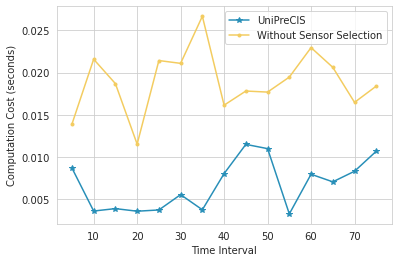

In [ ]:
plot(time_consumption_with_sensor_selection, "*", "#288fb8", "Time Interval", "Computation Cost (seconds)", "UniPreCIS")
plot(time_consumption_without_sensor_selection, ".", "#f3cc60", "Time Interval", "Computation Cost (seconds)", "Without Sensor Selection")
plt.show()

Decision Tree Regressor

Train set 2

In [ ]:
model = DecisionTreeClassifier()
model.fit(train_X_sensor_selection, train_y_sensor_selection)

DecisionTreeClassifier()

In [ ]:
accuracy_with_sensor_selection, time_consumption_with_sensor_selection, memory_consumption_with_sensor_selection, cpu_consumption_with_sensor_selection = machine_learning_with_sensor_selection(start_time, end_time, t, sample_df, model)

[INFO] Iteration Number: 0
Time: 0.0025899410247802734
Memory Usage: 912
Score: 1.0
The CPU usage is:  2.3
[INFO] Iteration Number: 1
Time: 0.0015299320220947266
Memory Usage: 2040
Score: 1.0
The CPU usage is:  1.9
[INFO] Iteration Number: 2
Time: 0.00450444221496582
Memory Usage: 2880
Score: 1.0
The CPU usage is:  1.6
[INFO] Iteration Number: 3
Time: 0.00188446044921875
Memory Usage: 3984
Score: 1.0
The CPU usage is:  1.9
[INFO] Iteration Number: 4
Time: 0.007769584655761719
Memory Usage: 5232
Score: 1.0
The CPU usage is:  2.6
[INFO] Iteration Number: 5
Time: 0.00261688232421875
Memory Usage: 6408
Score: 1.0
The CPU usage is:  1.9
[INFO] Iteration Number: 6
Time: 0.0021581649780273438
Memory Usage: 7632
Score: 1.0
The CPU usage is:  2.1
[INFO] Iteration Number: 7
Time: 0.0016160011291503906
Memory Usage: 8664
Score: 1.0
The CPU usage is:  1.3
[INFO] Iteration Number: 8
Time: 0.0023872852325439453
Memory Usage: 9624
Score: 1.0
The CPU usage is:  2.1
[INFO] Iteration Number: 9
Time: 0.0

In [ ]:
accuracy_with_sensor_selection_array = np.array(accuracy_with_sensor_selection)
x = accuracy_with_sensor_selection_array[:, 0]
print("Average accuracy with sensor selection:", sum(x)/len(accuracy_with_sensor_selection))

Average accuracy with sensor selection: 0.8421185770750987


In [ ]:
#####EDIT#######
df_compare = pd.DataFrame()
df_compare["temp"] = sample_df["51_temp"]
df_compare["humidity"] = sample_df["51_humidity"]
y_compare = sample_df["number of person"]

pred = model.predict(df_compare)
print(accuracy_score(y_compare, pred))

0.39730639730639733


In [ ]:
accuracy_without_sensor_selection, time_consumption_without_sensor_selection, memory_consumption_without_sensor_selection, cpu_consumption_without_sensor_selection = machine_learning_without_sensor_selection(start_time, end_time, t, sample_df, model)

[INFO] Iteration Number: 0
Time: 0.014551162719726562
Memory Usage: 2736
CPU Utlization: 2.1
Score: 1.0
[INFO] Iteration Number: 1
Time: 0.018140792846679688
Memory Usage: 6120
CPU Utlization: 2.1
Score: 1.0
[INFO] Iteration Number: 2
Time: 0.01536417007446289
Memory Usage: 8640
CPU Utlization: 2.0
Score: 1.0
[INFO] Iteration Number: 3
Time: 0.0173189640045166
Memory Usage: 11952
CPU Utlization: 9.7
Score: 1.0
[INFO] Iteration Number: 4
Time: 0.015869140625
Memory Usage: 15696
CPU Utlization: 18.0
Score: 0.6346153846153846
[INFO] Iteration Number: 5
Time: 0.009617090225219727
Memory Usage: 19224
CPU Utlization: 2.0
Score: 0.0
[INFO] Iteration Number: 6
Time: 0.011236906051635742
Memory Usage: 22896
CPU Utlization: 1.6
Score: 0.0
[INFO] Iteration Number: 7
Time: 0.009965896606445312
Memory Usage: 25992
CPU Utlization: 2.0
Score: 0.0
[INFO] Iteration Number: 8
Time: 0.014491558074951172
Memory Usage: 28872
CPU Utlization: 1.7
Score: 0.0
[INFO] Iteration Number: 9
Time: 0.0158033370971679

In [ ]:
accuracy_without_sensor_selection_array = np.array(accuracy_without_sensor_selection)
x = accuracy_without_sensor_selection_array[:, 0]
print("Average accuracy without sensor selection:", sum(x)/len(accuracy_without_sensor_selection))

Average accuracy without sensor selection: 0.3658632478632479


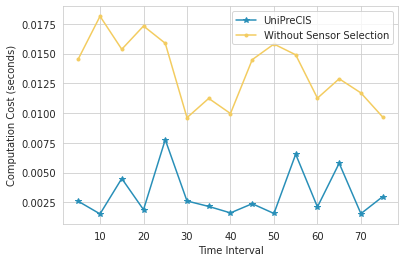

In [ ]:
plot(time_consumption_with_sensor_selection, "*", "#288fb8", "Time Interval", "Computation Cost (seconds)", "UniPreCIS")
plot(time_consumption_without_sensor_selection, ".", "#f3cc60", "Time Interval", "Computation Cost (seconds)", "Without Sensor Selection")
plt.show()

Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(train_X_sensor_selection, train_y_sensor_selection)

LogisticRegression()

Our Approach

In [ ]:
accuracy_with_sensor_selection, time_consumption_with_sensor_selection, memory_consumption_with_sensor_selection, cpu_consumption_with_sensor_selection = machine_learning_with_sensor_selection(start_time, end_time, t, sample_df, model)

[INFO] Iteration Number: 0
Time: 0.0028679370880126953
Memory Usage: 912
Score: 1.0
The CPU usage is:  3.0
[INFO] Iteration Number: 1
Time: 0.0041544437408447266
Memory Usage: 2040
Score: 1.0
The CPU usage is:  2.1
[INFO] Iteration Number: 2
Time: 0.0015532970428466797
Memory Usage: 2880
Score: 1.0
The CPU usage is:  5.4
[INFO] Iteration Number: 3
Time: 0.002274036407470703
Memory Usage: 3984
Score: 1.0
The CPU usage is:  56.5
[INFO] Iteration Number: 4
Time: 0.0015444755554199219
Memory Usage: 5232
Score: 1.0
The CPU usage is:  46.5
[INFO] Iteration Number: 5
Time: 0.0026123523712158203
Memory Usage: 6408
Score: 1.0
The CPU usage is:  35.0
[INFO] Iteration Number: 6
Time: 0.0015444755554199219
Memory Usage: 7632
Score: 1.0
The CPU usage is:  1.9
[INFO] Iteration Number: 7
Time: 0.0015492439270019531
Memory Usage: 8664
Score: 1.0
The CPU usage is:  1.9
[INFO] Iteration Number: 8
Time: 0.0034940242767333984
Memory Usage: 9624
Score: 1.0
The CPU usage is:  1.7
[INFO] Iteration Number: 9


In [ ]:
accuracy_with_sensor_selection_array = np.array(accuracy_with_sensor_selection)
x = accuracy_with_sensor_selection_array[:, 0]
print("Average accuracy with sensor selection:", sum(x)/len(accuracy_with_sensor_selection))

Average accuracy with sensor selection: 0.8421185770750987


TOPSIS

In [ ]:
#####EDIT#######
df_compare = pd.DataFrame()
df_compare["temp"] = sample_df["51_temp"]
df_compare["humidity"] = sample_df["51_humidity"]
y_compare = sample_df["number of person"]

pred = model.predict(df_compare)
print(accuracy_score(y_compare, pred))

0.388327721661055


Without Sensor Selection

In [ ]:
accuracy_without_sensor_selection, time_consumption_without_sensor_selection, memory_consumption_without_sensor_selection, cpu_consumption_without_sensor_selection = machine_learning_without_sensor_selection(start_time, end_time, t, sample_df, model)

[INFO] Iteration Number: 0
Time: 0.011814117431640625
Memory Usage: 2736
CPU Utlization: 2.5
Score: 1.0
[INFO] Iteration Number: 1
Time: 0.015558958053588867
Memory Usage: 6120
CPU Utlization: 1.6
Score: 1.0
[INFO] Iteration Number: 2
Time: 0.021155595779418945
Memory Usage: 8640
CPU Utlization: 2.2
Score: 1.0
[INFO] Iteration Number: 3
Time: 0.010358333587646484
Memory Usage: 11952
CPU Utlization: 1.4
Score: 1.0
[INFO] Iteration Number: 4
Time: 0.018987417221069336
Memory Usage: 15696
CPU Utlization: 2.4
Score: 1.0
[INFO] Iteration Number: 5
Time: 0.016019582748413086
Memory Usage: 19224
CPU Utlization: 1.5
Score: 1.0
[INFO] Iteration Number: 6
Time: 0.018886566162109375
Memory Usage: 22896
CPU Utlization: 2.0
Score: 1.0
[INFO] Iteration Number: 7
Time: 0.009728670120239258
Memory Usage: 25992
CPU Utlization: 13.1
Score: 1.0
[INFO] Iteration Number: 8
Time: 0.022878170013427734
Memory Usage: 28872
CPU Utlization: 15.0
Score: 1.0
[INFO] Iteration Number: 9
Time: 0.009426355361938477
Me

In [ ]:
accuracy_without_sensor_selection_array = np.array(accuracy_without_sensor_selection)
x = accuracy_without_sensor_selection_array[:, 0]
print("Average accuracy with sensor selection:", sum(x)/len(accuracy_without_sensor_selection))

Average accuracy with sensor selection: 0.7373121693121693


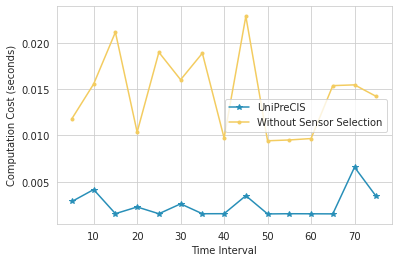

In [ ]:
plot(time_consumption_with_sensor_selection, "*", "#288fb8", "Time Interval", "Computation Cost (seconds)", "UniPreCIS")
plot(time_consumption_without_sensor_selection, ".", "#f3cc60", "Time Interval", "Computation Cost (seconds)", "Without Sensor Selection")
plt.show()

Naive Bayes

In [ ]:
model = GaussianNB()
model.fit(train_X_sensor_selection, train_y_sensor_selection)

GaussianNB()

Our Approach

In [ ]:
accuracy_with_sensor_selection, time_consumption_with_sensor_selection, memory_consumption_with_sensor_selection, cpu_consumption_with_sensor_selection = machine_learning_with_sensor_selection(start_time, end_time, t, sample_df, model)

[INFO] Iteration Number: 0
Time: 0.0016808509826660156
Memory Usage: 912
Score: 1.0
The CPU usage is:  2.5
[INFO] Iteration Number: 1
Time: 0.0016331672668457031
Memory Usage: 2040
Score: 1.0
The CPU usage is:  1.8
[INFO] Iteration Number: 2
Time: 0.0016565322875976562
Memory Usage: 2880
Score: 1.0
The CPU usage is:  1.5
[INFO] Iteration Number: 3
Time: 0.0016105175018310547
Memory Usage: 3984
Score: 1.0
The CPU usage is:  2.2
[INFO] Iteration Number: 4
Time: 0.0016400814056396484
Memory Usage: 5232
Score: 1.0
The CPU usage is:  1.9
[INFO] Iteration Number: 5
Time: 0.0018634796142578125
Memory Usage: 6408
Score: 1.0
The CPU usage is:  2.0
[INFO] Iteration Number: 6
Time: 0.0027861595153808594
Memory Usage: 7632
Score: 1.0
The CPU usage is:  1.9
[INFO] Iteration Number: 7
Time: 0.0016324520111083984
Memory Usage: 8664
Score: 1.0
The CPU usage is:  1.9
[INFO] Iteration Number: 8
Time: 0.00281524658203125
Memory Usage: 9624
Score: 1.0
The CPU usage is:  1.8
[INFO] Iteration Number: 9
Time

In [ ]:
accuracy_with_sensor_selection_array = np.array(accuracy_with_sensor_selection)
x = accuracy_with_sensor_selection_array[:, 0]
print("Average accuracy with sensor selection:", sum(x)/len(accuracy_with_sensor_selection))

Average accuracy with sensor selection: 0.7845907522429262


TOPSIS

In [ ]:
#####EDIT#######
df_compare = pd.DataFrame()
df_compare["temp"] = sample_df["51_temp"]
df_compare["humidity"] = sample_df["51_humidity"]
y_compare = sample_df["number of person"]

pred = model.predict(df_compare)
print(accuracy_score(y_compare, pred))

0.6958473625140292


Without sensor selection

In [ ]:
accuracy_without_sensor_selection, time_consumption_without_sensor_selection, memory_consumption_without_sensor_selection, cpu_consumption_without_sensor_selection = machine_learning_without_sensor_selection(start_time, end_time, t, sample_df, model)

[INFO] Iteration Number: 0
Time: 0.015059471130371094
Memory Usage: 2736
CPU Utlization: 3.0
Score: 1.0
[INFO] Iteration Number: 1
Time: 0.018549203872680664
Memory Usage: 6120
CPU Utlization: 1.5
Score: 1.0
[INFO] Iteration Number: 2
Time: 0.012836933135986328
Memory Usage: 8640
CPU Utlization: 1.9
Score: 1.0
[INFO] Iteration Number: 3
Time: 0.01471400260925293
Memory Usage: 11952
CPU Utlization: 1.6
Score: 1.0
[INFO] Iteration Number: 4
Time: 0.01685619354248047
Memory Usage: 15696
CPU Utlization: 1.9
Score: 1.0
[INFO] Iteration Number: 5
Time: 0.01921248435974121
Memory Usage: 19224
CPU Utlization: 1.8
Score: 1.0
[INFO] Iteration Number: 6
Time: 0.013656139373779297
Memory Usage: 22896
CPU Utlization: 2.1
Score: 1.0
[INFO] Iteration Number: 7
Time: 0.015704631805419922
Memory Usage: 25992
CPU Utlization: 1.6
Score: 1.0
[INFO] Iteration Number: 8
Time: 0.01528310775756836
Memory Usage: 28872
CPU Utlization: 1.8
Score: 1.0
[INFO] Iteration Number: 9
Time: 0.015129804611206055
Memory U

In [ ]:
accuracy_without_sensor_selection_array = np.array(accuracy_without_sensor_selection)
x = accuracy_without_sensor_selection_array[:, 0]
print("Average accuracy with sensor selection:", sum(x)/len(accuracy_without_sensor_selection))

Average accuracy with sensor selection: 0.9431111111111111


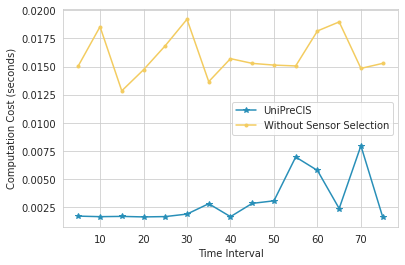

In [ ]:
plot(time_consumption_with_sensor_selection, "*", "#288fb8", "Time Interval", "Computation Cost (seconds)", "UniPreCIS")
plot(time_consumption_without_sensor_selection, ".", "#f3cc60", "Time Interval", "Computation Cost (seconds)", "Without Sensor Selection")
plt.show()

XGBoost

In [ ]:
model = XGBClassifier()
model.fit(train_X_sensor_selection, train_y_sensor_selection)

XGBClassifier()

Our Approach

In [ ]:
accuracy_with_sensor_selection, time_consumption_with_sensor_selection, memory_consumption_with_sensor_selection, cpu_consumption_with_sensor_selection = machine_learning_with_sensor_selection(start_time, end_time, t, sample_df, model)

[INFO] Iteration Number: 0
Time: 0.0011172294616699219
Memory Usage: 912
Score: 1.0
The CPU usage is:  2.8
[INFO] Iteration Number: 1
Time: 0.0010275840759277344
Memory Usage: 2040
Score: 1.0
The CPU usage is:  1.6
[INFO] Iteration Number: 2
Time: 0.0010483264923095703
Memory Usage: 2880
Score: 1.0
The CPU usage is:  2.0
[INFO] Iteration Number: 3
Time: 0.001035928726196289
Memory Usage: 3984
Score: 1.0
The CPU usage is:  1.6
[INFO] Iteration Number: 4
Time: 0.006044864654541016
Memory Usage: 5232
Score: 1.0
The CPU usage is:  1.9
[INFO] Iteration Number: 5
Time: 0.001092672348022461
Memory Usage: 6408
Score: 1.0
The CPU usage is:  1.4
[INFO] Iteration Number: 6
Time: 0.0032689571380615234
Memory Usage: 7632
Score: 1.0
The CPU usage is:  2.0
[INFO] Iteration Number: 7
Time: 0.0011088848114013672
Memory Usage: 8664
Score: 1.0
The CPU usage is:  2.0
[INFO] Iteration Number: 8
Time: 0.0017125606536865234
Memory Usage: 9624
Score: 1.0
The CPU usage is:  1.9
[INFO] Iteration Number: 9
Time:

In [ ]:
accuracy_with_sensor_selection_array = np.array(accuracy_with_sensor_selection)
x = accuracy_with_sensor_selection_array[:, 0]
print("Average accuracy with sensor selection:", sum(x)/len(accuracy_with_sensor_selection))

Average accuracy with sensor selection: 0.8421185770750987


TOPSIS

In [ ]:
#####EDIT#######
df_compare = pd.DataFrame()
df_compare["temp"] = sample_df["51_temp"]
df_compare["humidity"] = sample_df["51_humidity"]
y_compare = sample_df["number of person"]

pred = model.predict(df_compare)
print(accuracy_score(y_compare, pred))

0.7901234567901234


Without Sensor Selection

In [ ]:
accuracy_without_sensor_selection, time_consumption_without_sensor_selection, memory_consumption_without_sensor_selection, cpu_consumption_without_sensor_selection = machine_learning_without_sensor_selection(start_time, end_time, t, sample_df, model)

[INFO] Iteration Number: 0
Time: 0.011558055877685547
Memory Usage: 2736
CPU Utlization: 2.8
Score: 1.0
[INFO] Iteration Number: 1
Time: 0.00859975814819336
Memory Usage: 6120
CPU Utlization: 1.6
Score: 1.0
[INFO] Iteration Number: 2
Time: 0.008717775344848633
Memory Usage: 8640
CPU Utlization: 2.2
Score: 1.0
[INFO] Iteration Number: 3
Time: 0.011128425598144531
Memory Usage: 11952
CPU Utlization: 1.9
Score: 1.0
[INFO] Iteration Number: 4
Time: 0.017197132110595703
Memory Usage: 15696
CPU Utlization: 1.9
Score: 1.0
[INFO] Iteration Number: 5
Time: 0.01596856117248535
Memory Usage: 19224
CPU Utlization: 1.9
Score: 1.0
[INFO] Iteration Number: 6
Time: 0.01607680320739746
Memory Usage: 22896
CPU Utlization: 2.2
Score: 1.0
[INFO] Iteration Number: 7
Time: 0.013384819030761719
Memory Usage: 25992
CPU Utlization: 1.4
Score: 1.0
[INFO] Iteration Number: 8
Time: 0.011633872985839844
Memory Usage: 28872
CPU Utlization: 2.2
Score: 1.0
[INFO] Iteration Number: 9
Time: 0.01587820053100586
Memory U

In [ ]:
accuracy_without_sensor_selection_array = np.array(accuracy_without_sensor_selection)
x = accuracy_without_sensor_selection_array[:, 0]
print("Average accuracy with sensor selection:", sum(x)/len(accuracy_without_sensor_selection))

Average accuracy with sensor selection: 0.9431111111111111


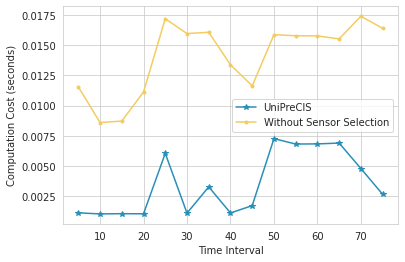

In [ ]:
plot(time_consumption_with_sensor_selection, "*", "#288fb8", "Time Interval", "Computation Cost (seconds)", "UniPreCIS")
plot(time_consumption_without_sensor_selection, ".", "#f3cc60", "Time Interval", "Computation Cost (seconds)", "Without Sensor Selection")
plt.show()

Random Forest Regressor

Train set 2

In [ ]:
model = RandomForestClassifier()
model.fit(train_X_sensor_selection, train_y_sensor_selection)

RandomForestClassifier()

In [ ]:
accuracy_with_sensor_selection, time_consumption_with_sensor_selection, memory_consumption_with_sensor_selection, cpu_consumption_with_sensor_selection = machine_learning_with_sensor_selection(start_time, end_time, t, sample_df, model)

[INFO] Iteration Number: 0
Time: 0.021496057510375977
Memory Usage: 912
Score: 1.0
The CPU usage is:  31.1
[INFO] Iteration Number: 1
Time: 0.019060611724853516
Memory Usage: 2040
Score: 1.0
The CPU usage is:  1.4
[INFO] Iteration Number: 2
Time: 0.019559621810913086
Memory Usage: 2880
Score: 1.0
The CPU usage is:  2.0
[INFO] Iteration Number: 3
Time: 0.013450860977172852
Memory Usage: 3984
Score: 1.0
The CPU usage is:  1.9
[INFO] Iteration Number: 4
Time: 0.017801523208618164
Memory Usage: 5232
Score: 1.0
The CPU usage is:  2.1
[INFO] Iteration Number: 5
Time: 0.015073776245117188
Memory Usage: 6408
Score: 1.0
The CPU usage is:  1.6
[INFO] Iteration Number: 6
Time: 0.011690139770507812
Memory Usage: 7632
Score: 1.0
The CPU usage is:  1.9
[INFO] Iteration Number: 7
Time: 0.018414974212646484
Memory Usage: 8664
Score: 1.0
The CPU usage is:  1.8
[INFO] Iteration Number: 8
Time: 0.019080400466918945
Memory Usage: 9624
Score: 1.0
The CPU usage is:  1.9
[INFO] Iteration Number: 9
Time: 0.01

In [ ]:
print(accuracy_with_sensor_selection)

In [ ]:
print(time_consumption_with_sensor_selection)

In [ ]:
plot(accuracy_with_sensor_selection, "*", "#288fb8", "Evaluation Duration (5 min)", "Accuracy", "With Sensor Selection")

In [ ]:
accuracy_with_sensor_selection_array = np.array(accuracy_with_sensor_selection)
x = accuracy_with_sensor_selection_array[:, 0]
print("Average accuracy with sensor selection:", sum(x)/len(accuracy_with_sensor_selection))

Average accuracy with sensor selection: 0.8421185770750987


In [ ]:
#####EDIT#######
df_compare = pd.DataFrame()
df_compare["temp"] = sample_df["51_temp"]
df_compare["humidity"] = sample_df["50_humidity"]
y_compare = sample_df["number of person"]

pred = model.predict(df_compare)
print(accuracy_score(y_compare, pred))

0.8327721661054994


In [ ]:
plot(time_consumption_with_sensor_selection, "*", "#288fb8", "Evaluation Duration (5 min)", "Time Consumption (seconds)", "With Sensor Selection")

In [ ]:
plot(memory_consumption_with_sensor_selection, "*", "#288fb8", "Evaluation Duration (5 min)", "Memory Consumption (data points)", "With Sensor Selection")

In [ ]:
plot(cpu_consumption_with_sensor_selection, "*", "#288fb8", "Evaluation Duration (5 min)", "CPU Consumption (percentage)", "With Sensor Selection")

In [ ]:
accuracy_without_sensor_selection, time_consumption_without_sensor_selection, memory_consumption_without_sensor_selection, cpu_consumption_without_sensor_selection = machine_learning_without_sensor_selection(start_time, end_time, t, sample_df, model)

[INFO] Iteration Number: 0
Time: 0.018769502639770508
Memory Usage: 2736
CPU Utlization: 2.1
Score: 1.0
[INFO] Iteration Number: 1
Time: 0.019089221954345703
Memory Usage: 6120
CPU Utlization: 1.8
Score: 1.0
[INFO] Iteration Number: 2
Time: 0.01995539665222168
Memory Usage: 8640
CPU Utlization: 1.4
Score: 1.0
[INFO] Iteration Number: 3
Time: 0.031133174896240234
Memory Usage: 11952
CPU Utlization: 1.9
Score: 1.0
[INFO] Iteration Number: 4
Time: 0.02597188949584961
Memory Usage: 15696
CPU Utlization: 1.7
Score: 1.0
[INFO] Iteration Number: 5
Time: 0.026396512985229492
Memory Usage: 19224
CPU Utlization: 2.2
Score: 1.0
[INFO] Iteration Number: 6
Time: 0.026190757751464844
Memory Usage: 22896
CPU Utlization: 1.5
Score: 1.0
[INFO] Iteration Number: 7
Time: 0.024788379669189453
Memory Usage: 25992
CPU Utlization: 1.7
Score: 1.0
[INFO] Iteration Number: 8
Time: 0.025922775268554688
Memory Usage: 28872
CPU Utlization: 1.8
Score: 1.0
[INFO] Iteration Number: 9
Time: 0.03132462501525879
Memory 

In [ ]:
print(accuracy_without_sensor_selection)

In [ ]:
print(time_consumption_without_sensor_selection)

In [ ]:
plot(accuracy_without_sensor_selection, ".", "#f3cc60", "Evaluation Duration (5 min)", "Accuracy", "Without Sensor Selection")

In [ ]:
accuracy_without_sensor_selection_array = np.array(accuracy_without_sensor_selection)
x = accuracy_without_sensor_selection_array[:, 0]
print("Average accuracy without sensor selection:", sum(x)/len(accuracy_without_sensor_selection))

Average accuracy without sensor selection: 0.9431111111111111


In [ ]:
plot(time_consumption_without_sensor_selection, ".", "#f3cc60", "Evaluation Duration (5 min)", "Time Consumption (seconds)", "Without Sensor Selection")

In [ ]:
plot(memory_consumption_without_sensor_selection, ".", "#f3cc60", "Evaluation Duration (5 min)", "Memory Consumption (data points)", "Without Sensor Selection")

In [ ]:
plot(cpu_consumption_without_sensor_selection, ".", "#f3cc60", "Evaluation Duration (5 min)", "CPU Consumption (percentage)", "Without Sensor Selection")

In [ ]:
accuracy_without_sensor_selection_total, time_consumption_without_sensor_selection_total, memory_consumption_without_sensor_selection_total, cpu_consumption_without_sensor_selection_total = machine_learning_without_sensor_selection_individual(start_time, end_time, t, df, RandomForestClassifier(), train_set_2_X, train_set_2_y, 2)

In [ ]:
# calculation of accuracy for individual sensors
accuracy_without_sensor_selection_individual_1 = accuracy_without_sensor_selection_total[0][1]
accuracy_without_sensor_selection_individual_2 = accuracy_without_sensor_selection_total[1][1]

Comparison

In [ ]:
plot(accuracy_with_sensor_selection, "*", "#288fb8", "Evaluation Duration (5 min)", "Accuracy", "With Sensor Selection")
plot(accuracy_without_sensor_selection, ".", "#f3cc60", "Evaluation Duration (5 min)", "Accuracy", "Without Sensor Selection")
plt.show()

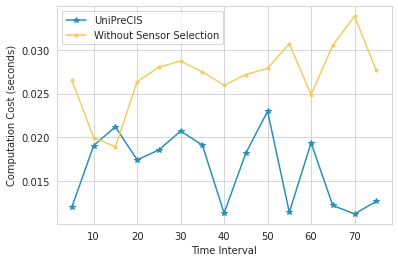

In [ ]:
plot(time_consumption_with_sensor_selection, "*", "#288fb8", "Time Interval", "Computation Cost (seconds)", "UniPreCIS")
plot(time_consumption_without_sensor_selection, ".", "#f3cc60", "Time Interval", "Computation Cost (seconds)", "Without Sensor Selection")
plt.show()

In [ ]:
plot(memory_consumption_with_sensor_selection, "*", "#288fb8", "Evaluation Duration (5 min)", "Memory Consumption (data points)", "With Sensor Selection")
plot(memory_consumption_without_sensor_selection, ".", "#f3cc60", "Evaluation Duration (5 min)", "Memory Consumption (data points)", "Without Sensor Selection")
plt.show()

In [ ]:
plot(cpu_consumption_with_sensor_selection, "*", "#288fb8", "Evaluation Duration (5 min)", "CPU Consumption (percentage)", "With Sensor Selection")
plot(cpu_consumption_without_sensor_selection, ".", "#f3cc60", "Evaluation Duration (5 min)", "CPU Consumption (percentage)", "Without Sensor Selection")
plot_average(cpu_consumption_with_sensor_selection, "#FEC5E5", "Avg. with Sensor Selection")
plot_average(cpu_consumption_without_sensor_selection, "#FE7F9C", "Avg. without Sensor Selection")
plt.show()

In [ ]:
rf_accuracy = two_d_list_to_dataframe(accuracy_with_sensor_selection, accuracy_without_sensor_selection, accuracy_without_sensor_selection_individual_1, accuracy_without_sensor_selection_individual_2, "Interval", "RF_with_sensor_selection", "RF_without_sensor_selection", "RF_without_sensor_selection_sensor_1", "RF_without_sensor_selection_sensor_2")

In [ ]:
print(rf_accuracy)

SVM

Train set 2

In [ ]:
model = SVC()
model.fit(train_X_sensor_selection, train_y_sensor_selection)

SVC()

In [ ]:
accuracy_with_sensor_selection, time_consumption_with_sensor_selection, memory_consumption_with_sensor_selection, cpu_consumption_with_sensor_selection = machine_learning_with_sensor_selection(start_time, end_time, t, sample_df, model)

[INFO] Iteration Number: 0
Time: 0.002731800079345703
Memory Usage: 912
Score: 1.0
The CPU usage is:  2.6
[INFO] Iteration Number: 1
Time: 0.00621342658996582
Memory Usage: 2040
Score: 1.0
The CPU usage is:  2.0
[INFO] Iteration Number: 2
Time: 0.00829315185546875
Memory Usage: 2880
Score: 1.0
The CPU usage is:  1.4
[INFO] Iteration Number: 3
Time: 0.004014253616333008
Memory Usage: 3984
Score: 1.0
The CPU usage is:  2.2
[INFO] Iteration Number: 4
Time: 0.0041468143463134766
Memory Usage: 5232
Score: 1.0
The CPU usage is:  1.8
[INFO] Iteration Number: 5
Time: 0.003007650375366211
Memory Usage: 6408
Score: 1.0
The CPU usage is:  1.9
[INFO] Iteration Number: 6
Time: 0.0030488967895507812
Memory Usage: 7632
Score: 1.0
The CPU usage is:  1.7
[INFO] Iteration Number: 7
Time: 0.00298309326171875
Memory Usage: 8664
Score: 1.0
The CPU usage is:  2.2
[INFO] Iteration Number: 8
Time: 0.0063402652740478516
Memory Usage: 9624
Score: 1.0
The CPU usage is:  1.6
[INFO] Iteration Number: 9
Time: 0.010

In [ ]:
print(accuracy_with_sensor_selection)

In [ ]:
print(time_consumption_with_sensor_selection)

In [ ]:
plot(accuracy_with_sensor_selection, "*", "#288fb8", "Evaluation Duration (5 min)", "Accuracy", "With Sensor Selection")

In [ ]:
accuracy_with_sensor_selection_array = np.array(accuracy_with_sensor_selection)
x = accuracy_with_sensor_selection_array[:, 0]
print("Average accuracy with sensor selection:", sum(x)/len(accuracy_with_sensor_selection))

Average accuracy with sensor selection: 0.9431111111111111


In [ ]:
#####EDIT#######
df_compare = pd.DataFrame()
df_compare["temp"] = sample_df["51_temp"]
df_compare["humidity"] = sample_df["51_humidity"]
y_compare = sample_df["number of person"]

pred = model.predict(df_compare)
print(accuracy_score(y_compare, pred))

0.4298540965207632


In [ ]:
plot(time_consumption_with_sensor_selection, "*", "#288fb8", "Evaluation Duration (5 min)", "Time Consumption (seconds)", "With Sensor Selection")

In [ ]:
plot(memory_consumption_with_sensor_selection, "*", "#288fb8", "Evaluation Duration (5 min)", "Memory Consumption (data points)", "With Sensor Selection")

In [ ]:
plot(cpu_consumption_with_sensor_selection, "*", "#288fb8", "Evaluation Duration (5 min)", "CPU Consumption (percentage)", "With Sensor Selection")

In [ ]:
accuracy_without_sensor_selection, time_consumption_without_sensor_selection, memory_consumption_without_sensor_selection, cpu_consumption_without_sensor_selection = machine_learning_without_sensor_selection(start_time, end_time, t, sample_df, model)

[INFO] Iteration Number: 0
Time: 0.011799335479736328
Memory Usage: 2736
CPU Utlization: 2.1
Score: 1.0
[INFO] Iteration Number: 1
Time: 0.017855405807495117
Memory Usage: 6120
CPU Utlization: 1.9
Score: 1.0
[INFO] Iteration Number: 2
Time: 0.017261505126953125
Memory Usage: 8640
CPU Utlization: 1.5
Score: 1.0
[INFO] Iteration Number: 3
Time: 0.016088008880615234
Memory Usage: 11952
CPU Utlization: 1.9
Score: 1.0
[INFO] Iteration Number: 4
Time: 0.019566059112548828
Memory Usage: 15696
CPU Utlization: 2.0
Score: 1.0
[INFO] Iteration Number: 5
Time: 0.01749706268310547
Memory Usage: 19224
CPU Utlization: 1.8
Score: 1.0
[INFO] Iteration Number: 6
Time: 0.01851034164428711
Memory Usage: 22896
CPU Utlization: 1.6
Score: 1.0
[INFO] Iteration Number: 7
Time: 0.019367218017578125
Memory Usage: 25992
CPU Utlization: 1.7
Score: 0.5581395348837209
[INFO] Iteration Number: 8
Time: 0.01656508445739746
Memory Usage: 28872
CPU Utlization: 2.1
Score: 0.0
[INFO] Iteration Number: 9
Time: 0.01666784286

In [ ]:
print(accuracy_without_sensor_selection)

In [ ]:
print(time_consumption_without_sensor_selection)

In [ ]:
plot(accuracy_without_sensor_selection, ".", "#f3cc60", "Evaluation Duration (5 min)", "Accuracy", "Without Sensor Selection")

In [ ]:
accuracy_without_sensor_selection_array = np.array(accuracy_without_sensor_selection)
x = accuracy_without_sensor_selection_array[:, 0]
print("Average accuracy without sensor selection:", sum(x)/len(accuracy_without_sensor_selection))

Average accuracy without sensor selection: 0.560764857881137


In [ ]:
plot(time_consumption_without_sensor_selection, ".", "#f3cc60", "Evaluation Duration (5 min)", "Time Consumption (seconds)", "Without Sensor Selection")

In [ ]:
plot(memory_consumption_without_sensor_selection, ".", "#f3cc60", "Evaluation Duration (5 min)", "Memory Consumption (data points)", "Without Sensor Selection")

In [ ]:
plot(cpu_consumption_without_sensor_selection, ".", "#f3cc60", "Evaluation Duration (5 min)", "CPU Consumption (percentage)", "Without Sensor Selection")

In [ ]:
accuracy_without_sensor_selection_total, time_consumption_without_sensor_selection_total, memory_consumption_without_sensor_selection_total, cpu_consumption_without_sensor_selection_total = machine_learning_without_sensor_selection_individual(start_time, end_time, t, df, SVC(), train_set_2_X, train_set_2_y, 2)

In [ ]:
# calculation of accuracy for individual sensors
accuracy_without_sensor_selection_individual_1 = accuracy_without_sensor_selection_total[0][1]
accuracy_without_sensor_selection_individual_2 = accuracy_without_sensor_selection_total[1][1]

In [ ]:
plot(accuracy_with_sensor_selection, "*", "#288fb8", "Evaluation Duration (5 min)", "Accuracy", "With Sensor Selection")
plot(accuracy_without_sensor_selection, ".", "#f3cc60", "Evaluation Duration (5 min)", "Accuracy", "Without Sensor Selection")
plt.show()

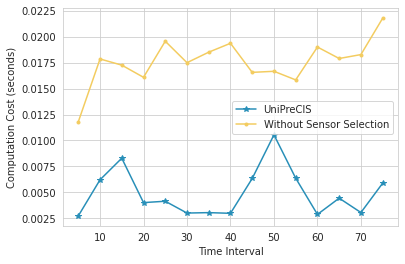

In [ ]:
plot(time_consumption_with_sensor_selection, "*", "#288fb8", "Time Interval", "Computation Cost (seconds)", "UniPreCIS")
plot(time_consumption_without_sensor_selection, ".", "#f3cc60", "Time Interval", "Computation Cost (seconds)", "Without Sensor Selection")
plt.show()

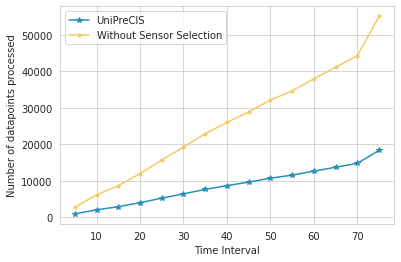

In [ ]:
plot(memory_consumption_with_sensor_selection, "*", "#288fb8", "Time Interval", "Number of datapoints processed", "UniPreCIS")
plot(memory_consumption_without_sensor_selection, ".", "#f3cc60", "Time Interval", "Number of datapoints processed", "Without Sensor Selection")
plt.show()

In [ ]:
plot(cpu_consumption_with_sensor_selection, "*", "#288fb8", "Evaluation Duration (5 min)", "CPU Consumption (percentage)", "With Sensor Selection")
plot(cpu_consumption_without_sensor_selection, ".", "#f3cc60", "Evaluation Duration (5 min)", "CPU Consumption (percentage)", "Without Sensor Selection")
plot_average(cpu_consumption_with_sensor_selection, "#FEC5E5", "Avg. with Sensor Selection")
plot_average(cpu_consumption_without_sensor_selection, "#FE7F9C", "Avg. without Sensor Selection")
plt.show()

In [ ]:
svc_accuracy = two_d_list_to_dataframe(accuracy_with_sensor_selection, accuracy_without_sensor_selection, accuracy_without_sensor_selection_individual_1, accuracy_without_sensor_selection_individual_2, "Interval", "SVC_with_sensor_selection", "SVC_without_sensor_selection", "SVC_without_sensor_selection_sensor_1", "SVC_without_sensor_selection_2")

In [ ]:
print(svc_accuracy)

In [ ]:
accuracy_table = knn_accuracy.merge(dt_accuracy, on = "Interval").merge(rf_accuracy, on = "Interval").merge(svc_accuracy, on = "Interval")

In [ ]:
print(accuracy_table.head())

In [ ]:
print(accuracy_table.columns)

In [ ]:
accuracy_table

In [ ]:
print(accuracy_table.columns)

In [ ]:
print("KNN With Sensor Selection:", accuracy_table["KNN_with_sensor_selection"].mean())
print("KNN Without Sensor Selection:", accuracy_table["KNN_without_sensor_selection"].mean())
print("KNN Without Sensor Selection Sensor-1", accuracy_table["KNN_without_sensor_selection_sensor_1"].mean())
print("KNN Without Sensor Selection Sensor-2", accuracy_table["KNN_without_sensor_selection_sensor_2"].mean())

print("DT With Sensor Selection:", accuracy_table["DT_with_sensor_selection"].mean())
print("DT Without Sensor Selection:", accuracy_table["DT_without_sensor_selection"].mean())
print("DT Without Sensor Selection Sensor-1", accuracy_table["DT_without_sensor_selection_senor_1"].mean())
print("DT Without Sensor Selection Sensor-2", accuracy_table["DT_without_sensor_selection_sensor_2"].mean())

print("RF With Sensor Selection:", accuracy_table["RF_with_sensor_selection"].mean())
print("RF Without Sensor Selection:", accuracy_table["RF_without_sensor_selection"].mean())
print("RF Without Sensor Selection Sensor-1", accuracy_table["RF_without_sensor_selection_sensor_1"].mean())
print("RF Without Sensor Selection Sensor-2", accuracy_table["RF_without_sensor_selection_sensor_2"].mean())

print("SVC With Sensor Selection:", accuracy_table["SVC_with_sensor_selection"].mean())
print("SVC Without Sensor Selection:", accuracy_table["SVC_without_sensor_selection"].mean())
print("SVC Without Sensor Selection Sensor-1", accuracy_table["SVC_without_sensor_selection_sensor_1"].mean())
print("SVC Without Sensor Selection Sensor-2", accuracy_table["SVC_without_sensor_selection_2"].mean())

In [ ]:
accuracy_dataframe = pd.DataFrame({
    "Machine Learning Model" : ["K Nearest Neighbors Classifier", "Decision Tree Classifier", "Random Forest Classifier", "SVM Classifier"],
    "With Sensor Selection" : [90.54, 95.04, 95.27, 50.23],
    "Without Sensor Selection": [73.01, 74.55, 81.98, 50.23],
    "Without Sensor Selection (Sensor-1)" : [44.00, 74.54, 74.99, 74.99],
    "Without Sensor Selection (Sensor-2)": [90.54, 95.04, 95.04, 95.04]
})

In [ ]:
accuracy_dataframe

In [ ]:
accuracy_dataframe = pd.DataFrame({
    "Machine Learning Model" : ["K Nearest Neighbors Classifier", "Decision Tree Classifier", "Random Forest Classifier", "SVM Classifier", "Logistic Regression", "Naive Bayes", "XGBoost"],
    "Our Approach" : [85.36, 93.02, 93.24, 50.23, 70.95, 69.59, 91.66],
    "TOPSIS": [67.44, 68.22, 77.25, 50.23, 52.71, 61.24, 72.86],
    "Without Sensor Selection":[76.35, 72.48, 72.88, 52.72, 64.86, 66.89, 76.35]
})

In [ ]:
accuracy_dataframe

In [ ]:
df

Comparison Approach

In [ ]:
#calculation of attributes: accuracy
def accuracy_attr(df, sensor, threshold=0.1):
  start = start_time
  window = datetime.timedelta(hours = 1, minutes = 0, seconds = 0)
  end = start_time + window

  df_ = df.loc[(df["Time"] >= start) & (df["Time"] < end)]
  mean = np.mean(df_[sensor])
  sensor_value = np.array(df_[sensor])
  correct_incorrect = sensor_value - mean
  correct = (correct_incorrect <= threshold).sum()
  acc_atr = correct/sensor_value.shape[0]

  #print(acc_atr)
  return acc_atr

In [ ]:
#calculation of attribyes: reliability
def reliability_attr(df, sensor):

  start = start_time
  window = datetime.timedelta(hours = 1, minutes = 0, seconds = 0)
  end = start_time + window

  df_ = df.loc[(df["Time"] >= start) & (df["Time"] < end)]

  #print(df_.shape[0])
  return df_.shape[0]

In [ ]:
#calculating attrs
#c1 -> accuracy
#c2 -> reliability

#for temperature
a11 = accuracy_attr(df, "52_temp")   #acc 22
a12 = reliability_attr(df, "52_temp") #reliability 22

a21 = accuracy_attr(df, "51_temp")   #acc 21
a22 = reliability_attr(df, "51_temp") #reliability 21

a31 = accuracy_attr(df, "50_temp")   #acc 20
a32 = reliability_attr(df, "50_temp") #reliability 20

print(a11, a12)
print(a21, a22)
print(a31, a32)

#for humidity
a11 = accuracy_attr(df, "52_humidity")   #acc 22
a12 = reliability_attr(df, "52_humidity") #reliability 22

a21 = accuracy_attr(df, "51_humidity")   #acc 21
a22 = reliability_attr(df, "51_humidity") #reliability 21

a31 = accuracy_attr(df, "50_humidity")   #acc 20
a32 = reliability_attr(df, "50_humidity") #reliability 20

print(a11, a12)
print(a21, a22)
print(a31, a32)

0.5593495934959349 615
0.6959349593495935 615
0.5219512195121951 615
0.6276422764227643 615
0.7398373983739838 615
0.5056910569105691 615


In [ ]:
#topsis algorithm
def topsis_algorithm(decision_matrix_A):
  """
  rows: correspond to the homogeneous sensors
  columns: correspond to sensor attributes
  """

  l, c = decision_matrix_A.shape    #l: number of rows; c: number of columns

  print("Decision Matrix:", decision_matrix_A)  #for debugging purposes

  #step1: normalize the matrix A to A' according to the following equation 1:
  for attribute in range(c):
    normalization_factor = np.sqrt(np.square(decision_matrix_A[:,attribute]).sum())
    decision_matrix_A[:,attribute] = decision_matrix_A[:,attribute]/normalization_factor
  
  print("Normalized Decision Matrix:", decision_matrix_A)   #for debugging purposes

  #step2: each sensor attribute's minimum values and maximum values in matric A' are calculated to get the 
  #optimal point and the worst point
  a_plusj = np.max(decision_matrix_A, axis=0)
  a_minusj = np.min(decision_matrix_A, axis=0)

  print("a_+j:", a_plusj)   #for debugging purposes
  print("a_-j:", a_minusj)  #for debugging purposes

  #step3: euclidean distance of every sensor option to a_plusj and a_minusj are computed and represented by:
  euclidean_distance = np.zeros((l, 2))
  for sensor in range(l):
    euclidean_distance[sensor][0] = np.sqrt(np.square(decision_matrix_A[sensor, :] - a_plusj).sum())
    euclidean_distance[sensor][1] = np.sqrt(np.square(decision_matrix_A[sensor, :] - a_minusj).sum())
  
  print("Euclidean Distance:", euclidean_distance)    #for debugging purposes

  #step4: set a measurement index to characterize and sort each sensor option according to the computed value.
  measurement_index = [ ]
  for sensor in range(l):
    measurement_index.append(euclidean_distance[sensor][1]/(euclidean_distance[sensor][0] + euclidean_distance[sensor][1]))

  print("Measurement Index:", measurement_index)  #for debugging purposes

  print("sensor selected:", measurement_index.index(min(measurement_index)))


In [ ]:
matrix = np.array([[-0.553475935828877, 82], [-0.6844919786096256, 82], [-0.553475935828877, 82]], dtype=float)
topsis_algorithm(matrix)

In [ ]:
matrix = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
matrix

In [ ]:
matrix[:, 0]/5.0990195135927845

In [ ]:
def machine_learning_with_sensor_selection_modif(start_time, end_time, t, df, model, X_train_mean, y_train_mean, sensor_selected):

  model.fit(X_train_mean, y_train_mean)

  #with sensor selection
  df_compare = pd.DataFrame()

  df_compare["temp"] = df[sensor_selected[0]] #0 would be temp
  df_compare["humidity"] = df[sensor_selected[1]] #1 would be humidity
  y_compare = df["number of people"]

  memory_consumption_with_sensor_selection = df_compare.memory_usage(index=True).sum()

  start_time_estimate = time.time()
  prediction_with_sensor_selection = model.predict(df_compare)
  score_with_sensor_selection = accuracy_score(y_compare, prediction_with_sensor_selection)
  end_time_estimate = time.time()

  estimate = end_time_estimate - start_time_estimate 

  cpu_consumption_with_sensor_selection = psutil.cpu_percent(5)

  accuracy_with_sensor_selection = score_with_sensor_selection
  time_consumption_with_sensor_selection = estimate

  return accuracy_with_sensor_selection, time_consumption_with_sensor_selection, memory_consumption_with_sensor_selection, cpu_consumption_with_sensor_selection